In [67]:
# --- Colab setup (auto-added) ---
import sys, os, subprocess

# 1) (Optional) GPU check
!nvidia-smi -L || echo "No GPU visible (that's fine if you don't need one)."

# 2) Install packages your notebook uses but Colab may not have
!pip -q install xgboost==2.1.1 seaborn scipy scikit-learn --upgrade
DATA_CSV ="/content/synthetic_usb.csv"

/bin/bash: line 1: nvidia-smi: command not found
No GPU visible (that's fine if you don't need one).


In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [69]:
import pandas as pd

df = pd.read_csv(DATA_CSV)
df.head()


,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,cpu_avg_percent,process_count,avg_process_runtime_sec,...,sectors_per_track,bytes_per_sector,sector_count,drive_model,drive_interface,removable_drive,source_data_size_MB,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,14.838413,39,1892.883542,...,0.977465,505.505595,2025.041956,Generic Flash Disk,USB,TRUE,1.452055,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,18.680961,65,11611.363060,...,0.975494,508.402335,2052.913219,SD Card Reader,USB,TRUE,1.224408,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,4.641624,57,-89.091813,...,-0.970243,-7.799536,-60.612247,Unknown,Unknown,Unknown,-1.010006,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,19.058356,44,-105.827810,...,1.004994,502.555282,1409.714639,Raspberry Pi Pico,USB,True,0.901491,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,17.318755,52,5427.013770,...,-0.995541,-13.411897,-56.287301,Unknown,Unknown,Unknown,-1.041743,-0.901407,-0.086591,0


In [70]:
df.columns

Index(['device_description', 'vendor_id', 'product_id', 'manufacturer',
       'location_id', 'usb_speed', 'power_mA', 'cpu_avg_percent',
       'process_count', 'avg_process_runtime_sec', 'ftk_available',
       'alt_usb_descriptor', 'source_type', 'cylinders', 'tracks_per_cylinder',
       'sectors_per_track', 'bytes_per_sector', 'sector_count', 'drive_model',
       'drive_interface', 'removable_drive', 'source_data_size_MB',
       'keystroke_mean_ms', 'keystroke_std_ms', 'label'],
      dtype='object')

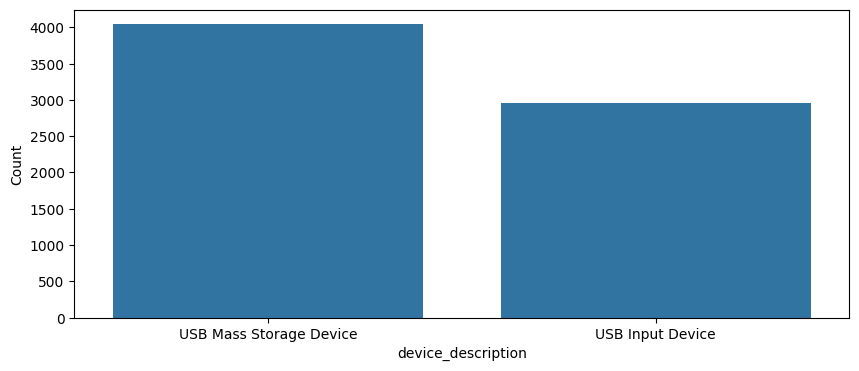

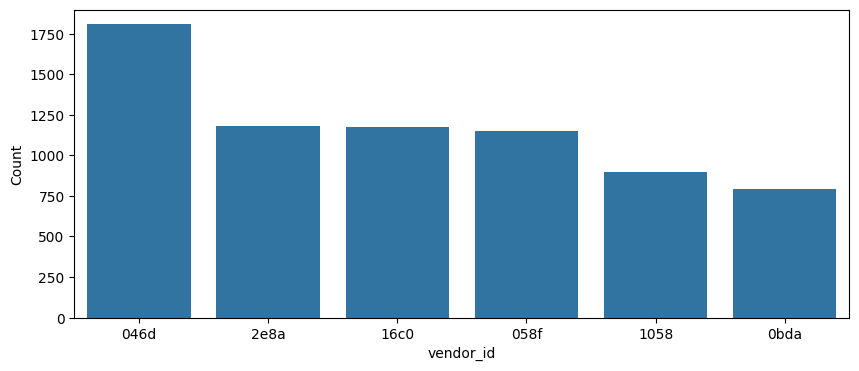

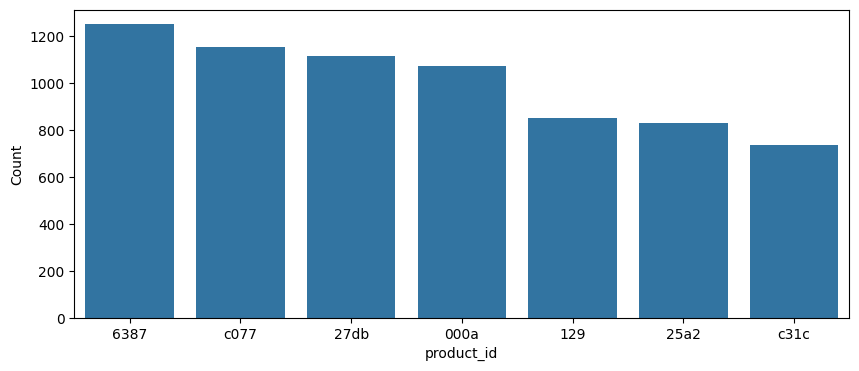

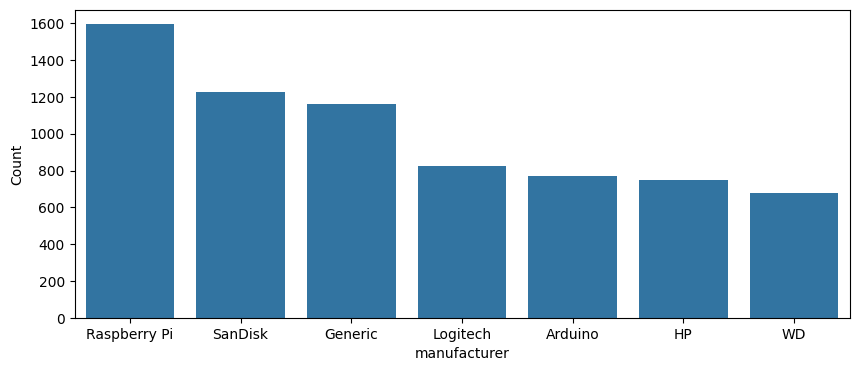

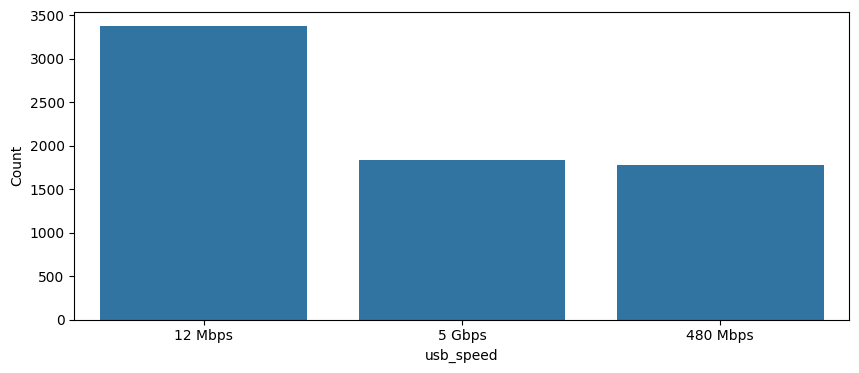

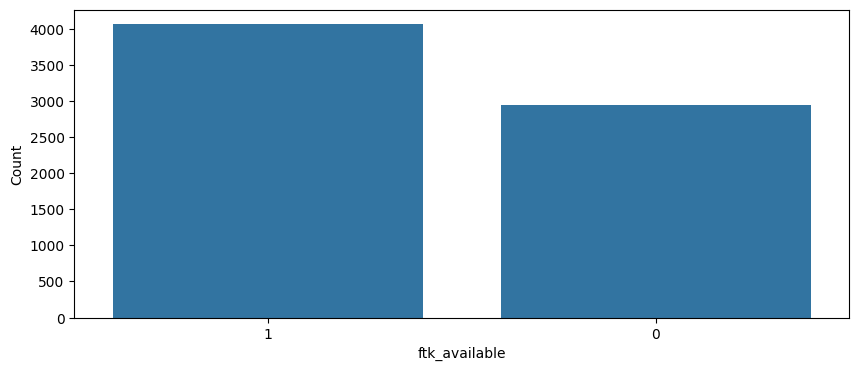

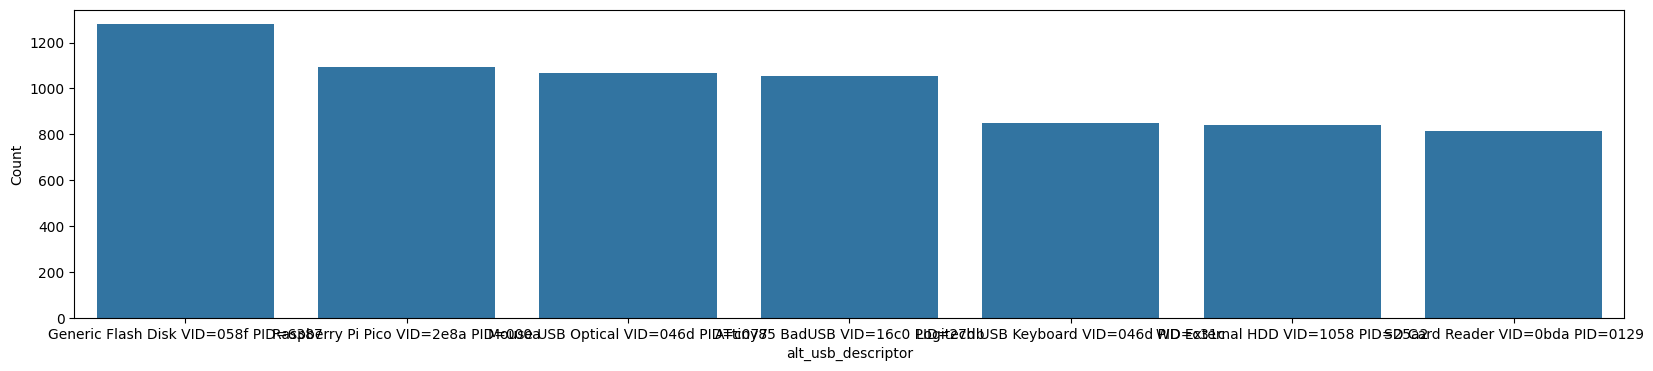

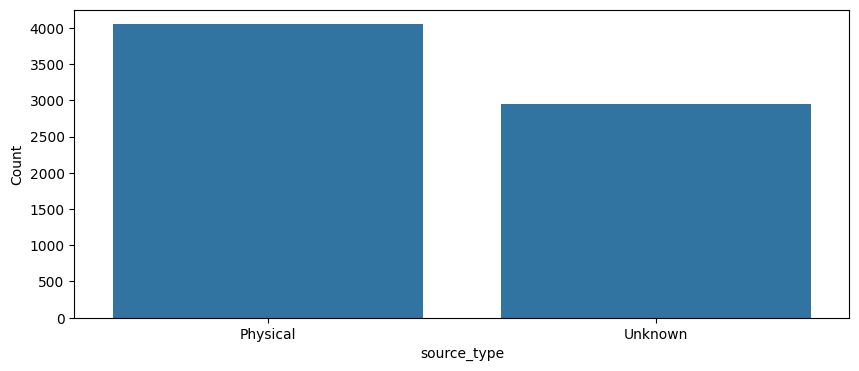

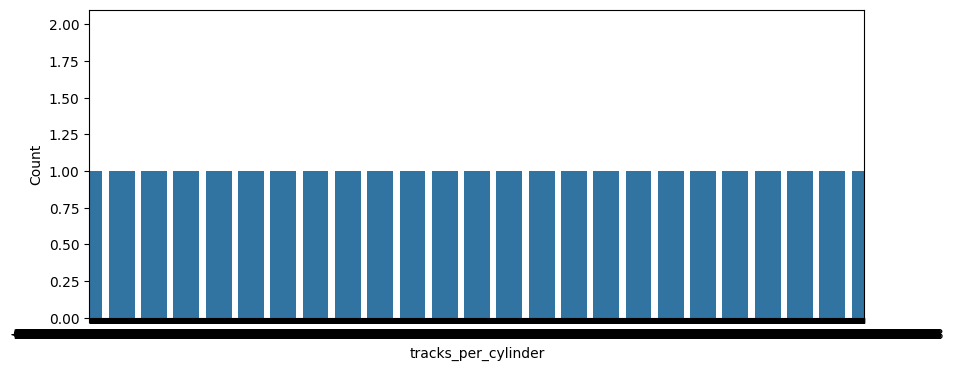

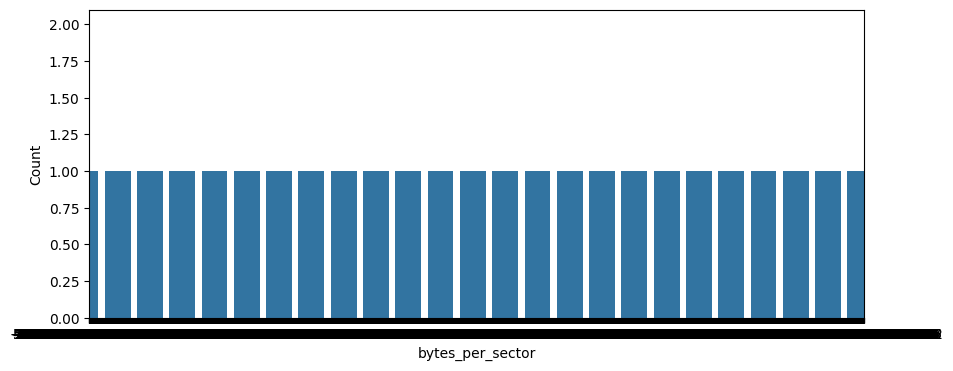

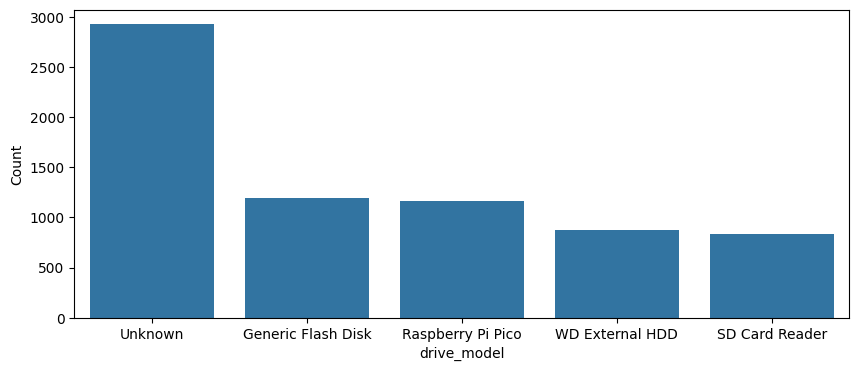

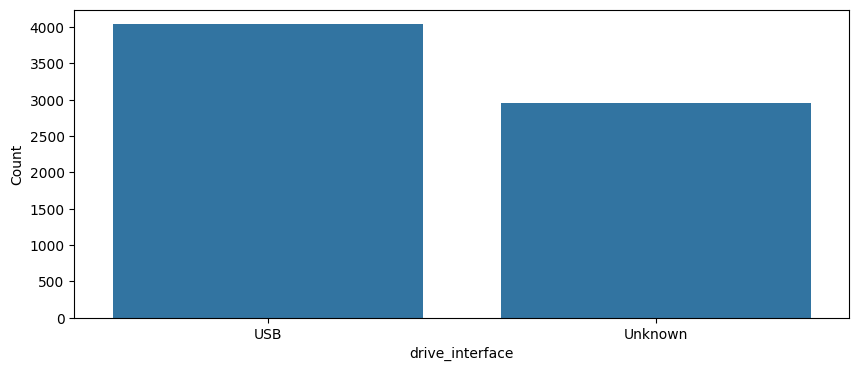

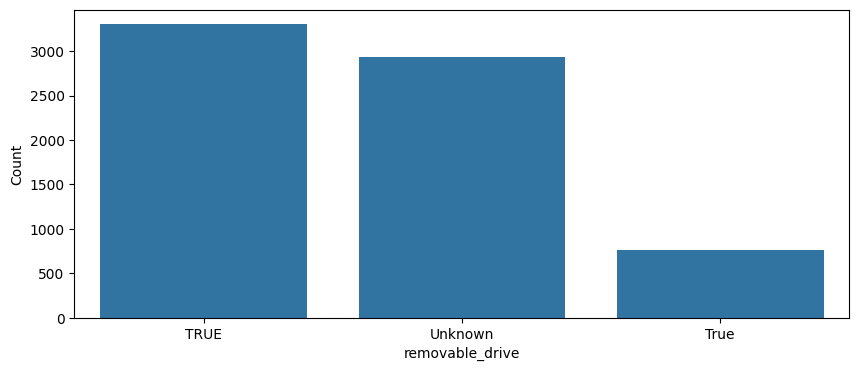

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.countplot(x=df['device_description'], order=df['device_description'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("device_description")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['vendor_id'], order=df['vendor_id'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("vendor_id")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x=df['product_id'], order=df['product_id'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("product_id")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['manufacturer'], order=df['manufacturer'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("manufacturer")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['usb_speed'], order=df['usb_speed'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("usb_speed")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['ftk_available'], order=df['ftk_available'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("ftk_available")
plt.show()

plt.figure(figsize=(20,4))
sns.countplot(x=df['alt_usb_descriptor'], order=df['alt_usb_descriptor'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("alt_usb_descriptor")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['source_type'], order=df['source_type'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("source_type")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['tracks_per_cylinder'], order=df['tracks_per_cylinder'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("tracks_per_cylinder")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['bytes_per_sector'], order=df['bytes_per_sector'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("bytes_per_sector")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['drive_model'], order=df['drive_model'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("drive_model")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['drive_interface'], order=df['drive_interface'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("drive_interface")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['removable_drive'], order=df['removable_drive'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("removable_drive")
plt.show()

In [72]:
import pandas as pd
from scipy.stats import pointbiserialr

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('label')
corrs = {}

for col in numeric_cols:
    corr, pval = pointbiserialr(df[col].fillna(0), df['label'])
    corrs[col] = corr

corr_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Correlation'])
print(corr_df.sort_values('Correlation', key=abs, ascending=False))


                         Correlation
keystroke_std_ms            0.480712
avg_process_runtime_sec    -0.406956
power_mA                   -0.405315
keystroke_mean_ms           0.307896
source_data_size_MB         0.174413
sectors_per_track           0.153011
ftk_available               0.152525
bytes_per_sector            0.147256
tracks_per_cylinder         0.145782
process_count              -0.118039
cylinders                   0.091933
cpu_avg_percent             0.061523
sector_count                0.002529


In [73]:
# ✅ keystroke_std_ms

# ✅ avg_process_runtime_sec

# ✅ power_mA

# ✅ keystroke_mean_ms

In [74]:
import scipy.stats as stats

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    table = pd.crosstab(df[col], df['label'])
    chi2, p, dof, ex = stats.chi2_contingency(table)
    print(f"{col}: chi2={chi2:.2f}, p={p:.4f}")


device_description: chi2=172.50, p=0.0000
vendor_id: chi2=3282.77, p=0.0000
product_id: chi2=3048.18, p=0.0000
manufacturer: chi2=117.96, p=0.0000
location_id: chi2=1501.86, p=0.0000
usb_speed: chi2=1576.88, p=0.0000
alt_usb_descriptor: chi2=3186.76, p=0.0000
source_type: chi2=160.30, p=0.0000
drive_model: chi2=2456.41, p=0.0000
drive_interface: chi2=162.70, p=0.0000
removable_drive: chi2=950.44, p=0.0000


In [75]:
# Feature	χ² value	Importance
# vendor_id	3282.77	Extremely strong
# alt_usb_descriptor	3186.76	Extremely strong
# product_id	3048.18	Extremely strong
# drive_model	2456.41	Very strong
# location_id	1501.86	Strong
# usb_speed	1576.88	Strong
# removable_drive	950.44	Strong
# device_description	172.50	Moderate
# source_type	160.30	Moderate
# drive_interface	162.70	Moderate
# manufacturer	117.96	Moderate

In [76]:
df1= df

In [77]:
df1 = df1.drop(columns=["cylinders", "cpu_avg_percent","sector_count","source_data_size_MB","sectors_per_track","ftk_available", "bytes_per_sector", "tracks_per_cylinder", "process_count" ])

In [78]:
df1.head()

,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,avg_process_runtime_sec,alt_usb_descriptor,source_type,drive_model,drive_interface,removable_drive,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,1892.883542,Raspberry Pi Pico VID=2e8a PID=000a,Physical,Generic Flash Disk,USB,TRUE,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,11611.363060,Generic Flash Disk VID=058f PID=6387,Physical,SD Card Reader,USB,TRUE,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,-89.091813,ATtiny85 BadUSB VID=16c0 PID=27db,Unknown,Unknown,Unknown,Unknown,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,-105.827810,Generic Flash Disk VID=058f PID=6387,Physical,Raspberry Pi Pico,USB,True,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,5427.013770,Mouse USB Optical VID=046d PID=c077,Unknown,Unknown,Unknown,Unknown,-0.901407,-0.086591,0


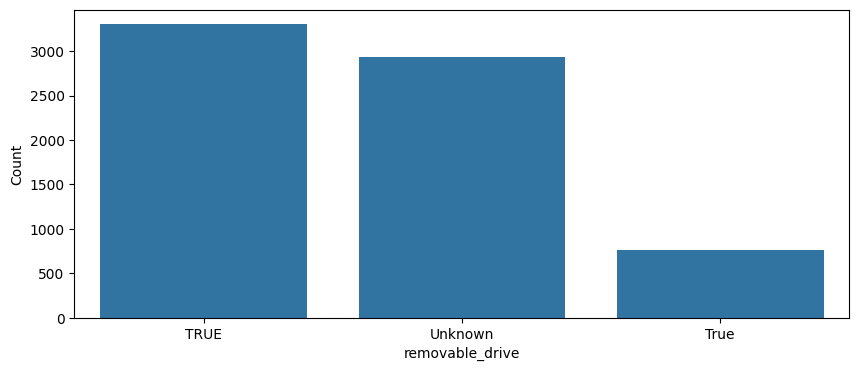

In [79]:
plt.figure(figsize=(10,4))
sns.countplot(x=df1['removable_drive'], order=df1['removable_drive'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("removable_drive")
plt.show()

In [80]:
df1["removable_drive"] = df1["removable_drive"].str.upper()

In [81]:
df1.isnull().sum()

,0
device_description,0
vendor_id,0
product_id,0
manufacturer,0
location_id,0
usb_speed,0
power_mA,0
avg_process_runtime_sec,0
alt_usb_descriptor,0
source_type,0


In [82]:
df1['keystroke_mean_ms'] = df1['keystroke_mean_ms'].replace("Null", 0).astype(float)
df1['keystroke_std_ms']  = df1['keystroke_std_ms'].replace("Null", 0).astype(float)

In [83]:
df1.isnull().sum()

,0
device_description,0
vendor_id,0
product_id,0
manufacturer,0
location_id,0
usb_speed,0
power_mA,0
avg_process_runtime_sec,0
alt_usb_descriptor,0
source_type,0


In [84]:
df1.head()

,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,avg_process_runtime_sec,alt_usb_descriptor,source_type,drive_model,drive_interface,removable_drive,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,1892.883542,Raspberry Pi Pico VID=2e8a PID=000a,Physical,Generic Flash Disk,USB,TRUE,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,11611.363060,Generic Flash Disk VID=058f PID=6387,Physical,SD Card Reader,USB,TRUE,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,-89.091813,ATtiny85 BadUSB VID=16c0 PID=27db,Unknown,Unknown,Unknown,UNKNOWN,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,-105.827810,Generic Flash Disk VID=058f PID=6387,Physical,Raspberry Pi Pico,USB,TRUE,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,5427.013770,Mouse USB Optical VID=046d PID=c077,Unknown,Unknown,Unknown,UNKNOWN,-0.901407,-0.086591,0


In [85]:
import scipy.stats as stats

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    table = pd.crosstab(df[col], df['label'])
    chi2, p, dof, ex = stats.chi2_contingency(table)
    print(f"{col}: chi2={chi2:.2f}, p={p:.4f}")


device_description: chi2=172.50, p=0.0000
vendor_id: chi2=3282.77, p=0.0000
product_id: chi2=3048.18, p=0.0000
manufacturer: chi2=117.96, p=0.0000
location_id: chi2=1501.86, p=0.0000
usb_speed: chi2=1576.88, p=0.0000
alt_usb_descriptor: chi2=3186.76, p=0.0000
source_type: chi2=160.30, p=0.0000
drive_model: chi2=2456.41, p=0.0000
drive_interface: chi2=162.70, p=0.0000
removable_drive: chi2=950.44, p=0.0000


In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [87]:
df1.head()

,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,avg_process_runtime_sec,alt_usb_descriptor,source_type,drive_model,drive_interface,removable_drive,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,1892.883542,Raspberry Pi Pico VID=2e8a PID=000a,Physical,Generic Flash Disk,USB,TRUE,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,11611.363060,Generic Flash Disk VID=058f PID=6387,Physical,SD Card Reader,USB,TRUE,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,-89.091813,ATtiny85 BadUSB VID=16c0 PID=27db,Unknown,Unknown,Unknown,UNKNOWN,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,-105.827810,Generic Flash Disk VID=058f PID=6387,Physical,Raspberry Pi Pico,USB,TRUE,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,5427.013770,Mouse USB Optical VID=046d PID=c077,Unknown,Unknown,Unknown,UNKNOWN,-0.901407,-0.086591,0


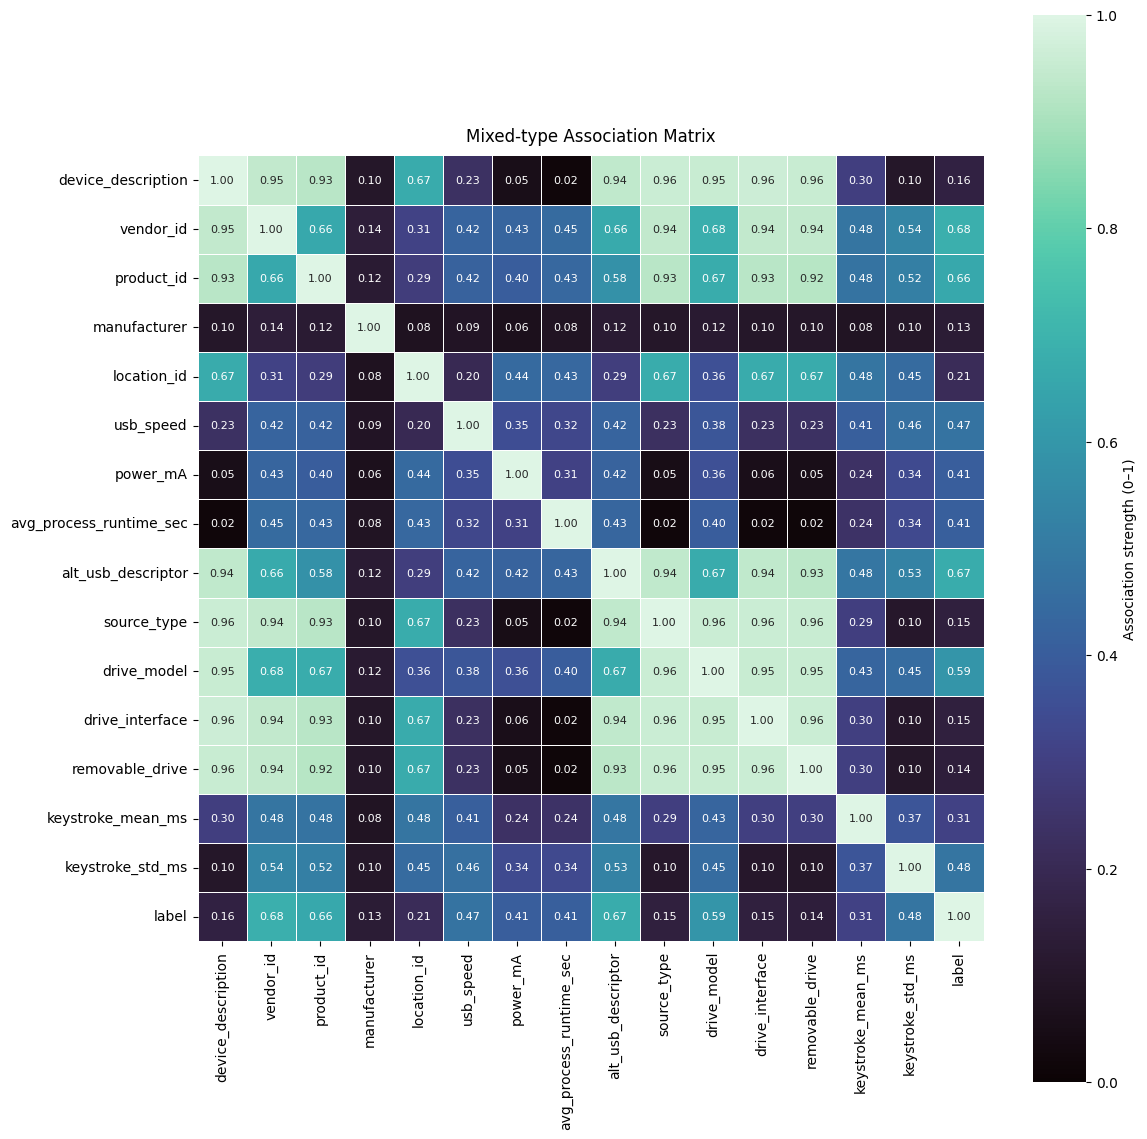

In [139]:
# --- prettier heatmap for your association matrix (drop in where you plot it now) ---
# Uses a nicer palette and prints the numeric values in each cell.

cmap_name = "mako"          # alternatives: "rocket_r", "magma", "cividis", "coolwarm"
fmt_str  = ".2f"            # value format inside boxes
line_w   = 0.4              # grid line width
ann_size = 8                # annotation font size

try:
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig_w = min(0.5*assoc.shape[1] + 4, 20)
    fig_h = min(0.5*assoc.shape[0] + 4, 20)

    plt.figure(figsize=(fig_w, fig_h))
    ax = sns.heatmap(
        assoc,
        vmin=0, vmax=1,
        cmap=cmap_name,
        annot=True, fmt=fmt_str, annot_kws={"size": ann_size},
        square=True,
        linewidths=line_w, linecolor="white",
        cbar_kws={"label": "Association strength (0–1)"}
    )
    ax.set_title("Mixed-type Association Matrix", pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()

except Exception:
    # Fallback without seaborn: matplotlib with annotations
    import matplotlib.pyplot as plt
    import numpy as np

    A = assoc.values
    cols = assoc.columns
    rows = assoc.index

    fig_w = min(0.5*A.shape[1] + 4, 20)
    fig_h = min(0.5*A.shape[0] + 4, 20)

    plt.figure(figsize=(fig_w, fig_h))
    im = plt.imshow(A, vmin=0, vmax=1, cmap="magma")
    plt.colorbar(im, label="Association strength (0–1)")
    plt.title("Mixed-type Association Matrix")
    plt.xticks(np.arange(A.shape[1]), cols, rotation=90)
    plt.yticks(np.arange(A.shape[0]), rows, rotation=0)

    # draw grid
    for y in np.arange(-0.5, A.shape[0], 1):
        plt.axhline(y, color="white", lw=line_w)
    for x in np.arange(-0.5, A.shape[1], 1):
        plt.axvline(x, color="white", lw=line_w)

    # annotate each cell with value; change text color for contrast
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            v = A[i, j]
            txt_color = "white" if v >= 0.55 else "black"
            plt.text(j, i, f"{v:{fmt_str}}", ha="center", va="center", color=txt_color, fontsize=ann_size)

    plt.tight_layout()
    plt.show()


label                      1.000000
keystroke_std_ms           0.480712
keystroke_mean_ms          0.307896
power_mA                  -0.405315
avg_process_runtime_sec   -0.406956
Name: label, dtype: float64


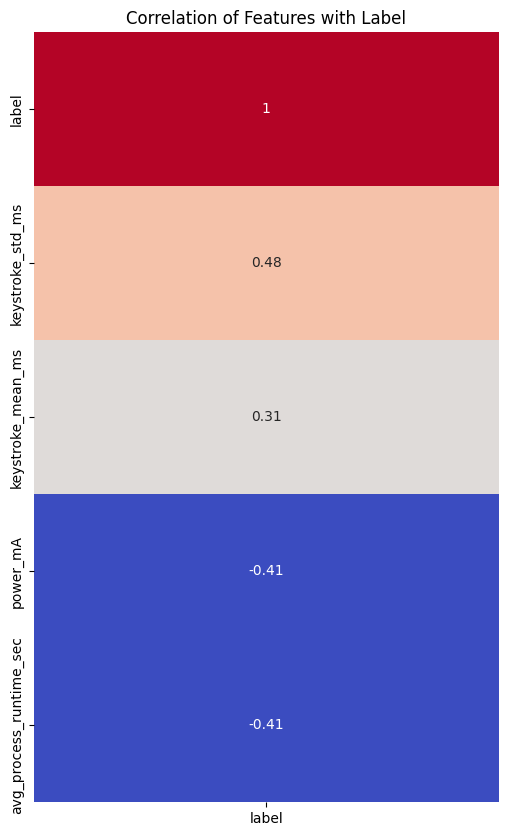

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr_matrix = df1.corr(numeric_only=True)

# show only correlation with label
label_corr = corr_matrix['label'].sort_values(ascending=False)
print(label_corr)

# visualize
plt.figure(figsize=(6,10))
sns.heatmap(label_corr.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Label")
plt.show()


In [89]:
df1.isnull().sum()

,0
device_description,0
vendor_id,0
product_id,0
manufacturer,0
location_id,0
usb_speed,0
power_mA,0
avg_process_runtime_sec,0
alt_usb_descriptor,0
source_type,0


In [90]:
import pandas as pd
import numpy as np

# Assume df is your dataset (without preprocessing)
# Drop label if present
numeric_cols = df1.select_dtypes(include=[np.number]).columns.drop('label', errors='ignore')

# Compute skewness
skewness = df1[numeric_cols].skew(numeric_only=True)

# Classify columns based on skewness
skewed_cols   = skewness[(abs(skewness) > 1) & (df1[numeric_cols].min() >= 0).all()].index.tolist()
robust_cols   = skewness[(abs(skewness) > 0.75) & (abs(skewness) <= 1)].index.tolist()
standard_cols = skewness[(abs(skewness) <= 0.75)].index.tolist()

print("Skewness values:")
print(skewness.sort_values(ascending=False))
print("\nRecommended scaling groups:")
print("log1p + RobustScaler (heavily skewed):", skewed_cols)
print("RobustScaler (moderately skewed):", robust_cols)
print("StandardScaler (symmetric):", standard_cols)


Skewness values:
keystroke_mean_ms          1.080809
keystroke_std_ms           0.870837
power_mA                   0.516896
avg_process_runtime_sec    0.406736
dtype: float64

Recommended scaling groups:
log1p + RobustScaler (heavily skewed): []
RobustScaler (moderately skewed): ['keystroke_std_ms']
StandardScaler (symmetric): ['power_mA', 'avg_process_runtime_sec']


In [91]:
df1.isnull().sum()

,0
device_description,0
vendor_id,0
product_id,0
manufacturer,0
location_id,0
usb_speed,0
power_mA,0
avg_process_runtime_sec,0
alt_usb_descriptor,0
source_type,0


In [92]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['label'])
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [93]:
# --- Leak-free preprocessing: fit on TRAIN only, apply to both ---
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, StandardScaler
import numpy as np

# Treat usb_speed as CATEGORICAL (don’t scale encoded category)
cat_cols       = ["alt_usb_descriptor","source_type","location_id","device_description",
                  "product_id","drive_model","drive_interface","removable_drive",
                  "vendor_id","manufacturer","usb_speed"]
num_log_robust = ["keystroke_mean_ms"]
num_robust     = ["keystroke_std_ms"]
num_standard   = ["power_mA", "avg_process_runtime_sec"]

# Categorical encoding
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[cat_cols] = oe.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = oe.transform(X_test[cat_cols])

# Numeric scaling (fit on train, transform both)
# log1p + robust
X_train[num_log_robust] = np.log1p(X_train[num_log_robust].clip(lower=0))
X_test[num_log_robust]  = np.log1p(X_test[num_log_robust].clip(lower=0))
rs1 = RobustScaler().fit(X_train[num_log_robust])
X_train[num_log_robust] = rs1.transform(X_train[num_log_robust])
X_test[num_log_robust]  = rs1.transform(X_test[num_log_robust])

# robust
rs2 = RobustScaler().fit(X_train[num_robust])
X_train[num_robust] = rs2.transform(X_train[num_robust])
X_test[num_robust]  = rs2.transform(X_test[num_robust])

# standard
ss = StandardScaler().fit(X_train[num_standard])
X_train[num_standard] = ss.transform(X_train[num_standard])
X_test[num_standard]  = ss.transform(X_test[num_standard])


In [94]:
print("Scaled train shape:", X_train.shape)
print("Scaled test shape:", X_test.shape)

Scaled train shape: (5600, 15)
Scaled test shape: (1400, 15)


# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# Define Logistic Regression model
logreg = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=10000,
    class_weight='balanced',   # handles imbalance in your dataset
    n_jobs=-1,
    random_state=42
)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred  = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Extra metrics
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print(f"Logistic Regression — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Logistic Regression — Accuracy: 0.8707
Precision: 0.8362, Recall: 0.8709, F1: 0.8532, ROC-AUC: 0.9369

Classification Report:
               precision    recall  f1-score   support

           0     0.8988    0.8706    0.8845       796
           1     0.8362    0.8709    0.8532       604

    accuracy                         0.8707      1400
   macro avg     0.8675    0.8707    0.8688      1400
weighted avg     0.8718    0.8707    0.8710      1400



In [96]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Train-set predictions
y_pred_tr  = logreg.predict(X_train)
y_proba_tr = logreg.predict_proba(X_train)[:, 1]

acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)

print(f"[Train]  Acc={acc_tr:.4f}  Prec={prec_tr:.4f}  Rec={rec_tr:.4f}  F1={f1_tr:.4f}  AUC={auc_tr:.4f}")

# Test-set metrics (you already computed, but for completeness)
from sklearn.metrics import classification_report
y_pred  = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)
print(f"[Test ]  Acc={acc:.4f}  Prec={prec:.4f}  Rec={rec:.4f}  F1={f1:.4f}  AUC={auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


[Train]  Acc=0.8520  Prec=0.8067  Rec=0.8638  F1=0.8342  AUC=0.9294
[Test ]  Acc=0.8707  Prec=0.8362  Rec=0.8709  F1=0.8532  AUC=0.9369

Classification Report:
               precision    recall  f1-score   support

           0     0.8988    0.8706    0.8845       796
           1     0.8362    0.8709    0.8532       604

    accuracy                         0.8707      1400
   macro avg     0.8675    0.8707    0.8688      1400
weighted avg     0.8718    0.8707    0.8710      1400



In [97]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
cv_f1  = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)

print(f"CV AUC: mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"CV  F1: mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


CV AUC: mean=0.9282 ± 0.0044
CV  F1: mean=0.8304 ± 0.0052


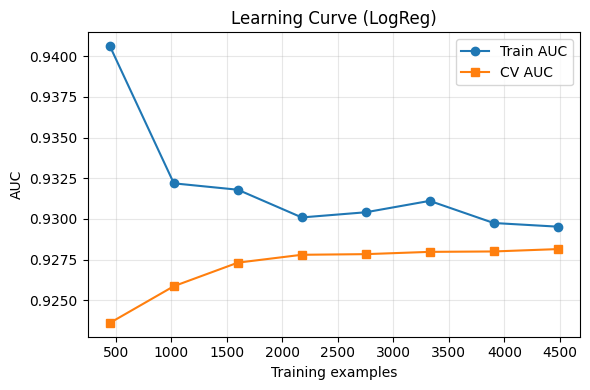

In [98]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=logreg,
    X=X_train, y=y_train,
    cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1, shuffle=True, random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, marker='o', label='Train AUC')
plt.plot(train_sizes, val_mean,   marker='s', label='CV AUC')
plt.xlabel("Training examples"); plt.ylabel("AUC"); plt.title("Learning Curve (LogReg)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


In [99]:
# Detect duplicate feature rows with conflicting labels (leakage risk)
import pandas as pd

# Works if X_train is a DataFrame; if it's an array, wrap into DataFrame with columns
if not isinstance(X_train, pd.DataFrame):
    import numpy as np
    Xtr_df = pd.DataFrame(X_train, columns=[f"f{i}" for i in range(X_train.shape[1])])
else:
    Xtr_df = X_train.copy()

tmp = Xtr_df.copy()
tmp["__y__"] = y_train.values if hasattr(y_train, "values") else y_train
dups = tmp.groupby(list(Xtr_df.columns))["__y__"].nunique()
conflicts = dups[dups > 1]
print(f"Conflicting duplicates in train: {int((conflicts>0).sum())}")


Conflicting duplicates in train: 0


<Figure size 1000x1000 with 0 Axes>

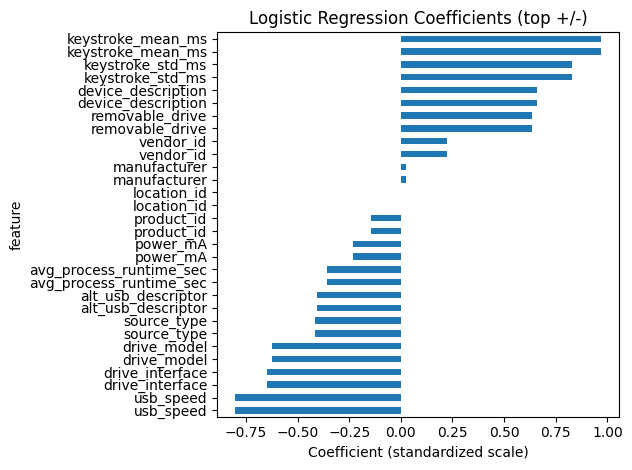


Top + features (push to malicious=1):
keystroke_mean_ms          0.967122
keystroke_std_ms           0.830880
device_description         0.659543
removable_drive            0.635548
vendor_id                  0.224552
manufacturer               0.025671
location_id                0.000010
product_id                -0.147009
power_mA                  -0.230449
avg_process_runtime_sec   -0.359228
alt_usb_descriptor        -0.404080
source_type               -0.416889
drive_model               -0.624473
drive_interface           -0.647988
usb_speed                 -0.801540
dtype: float64

Top - features (push to benign=0):
usb_speed                 -0.801540
drive_interface           -0.647988
drive_model               -0.624473
source_type               -0.416889
alt_usb_descriptor        -0.404080
avg_process_runtime_sec   -0.359228
power_mA                  -0.230449
product_id                -0.147009
location_id                0.000010
manufacturer               0.025671
vendor_id 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names
if hasattr(X_train, "columns"):
    feat_names = np.array(X_train.columns)
else:
    feat_names = np.array([f"f{i}" for i in range(X_train.shape[1])])

coefs = logreg.coef_.ravel()  # shape (n_features,)

# Top positive pushes (toward label=1) and negative pushes (toward label=0)
k = 20  # top-k to show
top_pos_idx = np.argsort(coefs)[-k:][::-1]
top_neg_idx = np.argsort(coefs)[:k]

imp_df = pd.DataFrame({
    "feature": np.concatenate([feat_names[top_pos_idx], feat_names[top_neg_idx]]),
    "coef":    np.concatenate([coefs[top_pos_idx],      coefs[top_neg_idx]])
})

plt.figure(figsize=(10,10))
imp_df.sort_values("coef").plot(kind="barh", x="feature", y="coef", legend=False)
plt.title("Logistic Regression Coefficients (top +/-)")
plt.xlabel("Coefficient (standardized scale)"); plt.tight_layout(); plt.show()

print("\nTop + features (push to malicious=1):")
print(pd.Series(coefs[top_pos_idx], index=feat_names[top_pos_idx]))

print("\nTop - features (push to benign=0):")
print(pd.Series(coefs[top_neg_idx], index=feat_names[top_neg_idx]))



Permutation Importance (AUC drop):
drive_model                4.058267e-02
alt_usb_descriptor         3.583231e-02
usb_speed                  1.824562e-02
keystroke_std_ms           1.266577e-02
keystroke_mean_ms          9.900496e-03
vendor_id                  7.705747e-03
device_description         5.039061e-03
avg_process_runtime_sec    5.023046e-03
drive_interface            4.770333e-03
removable_drive            3.988901e-03
power_mA                   3.281515e-03
product_id                 2.499251e-03
source_type                1.756922e-03
manufacturer               2.774635e-04
location_id                2.079936e-07
dtype: float64


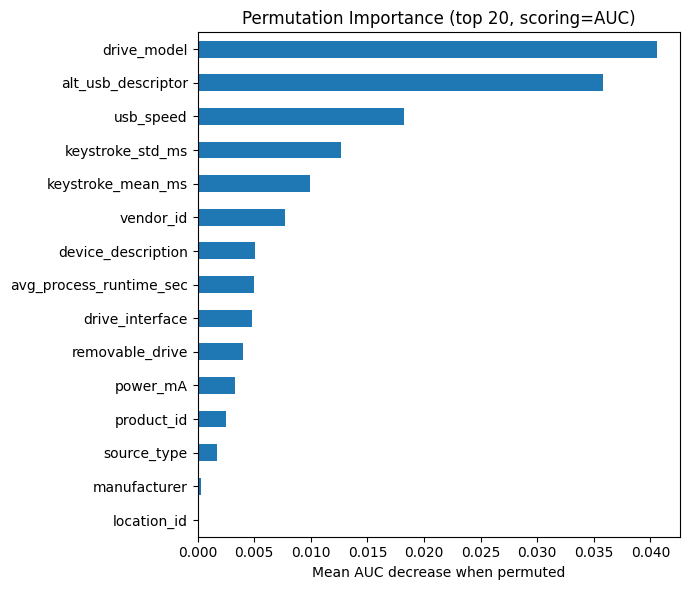

In [101]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    logreg, X_test, y_test,
    scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1
)

pi = pd.Series(result.importances_mean, index=feat_names).sort_values(ascending=False)

print("\nPermutation Importance (AUC drop):")
print(pi.head(25))

# Plot top 20
plt.figure(figsize=(7,6))
pi.head(20).sort_values().plot(kind="barh")
plt.title("Permutation Importance (top 20, scoring=AUC)")
plt.xlabel("Mean AUC decrease when permuted")
plt.tight_layout(); plt.show()


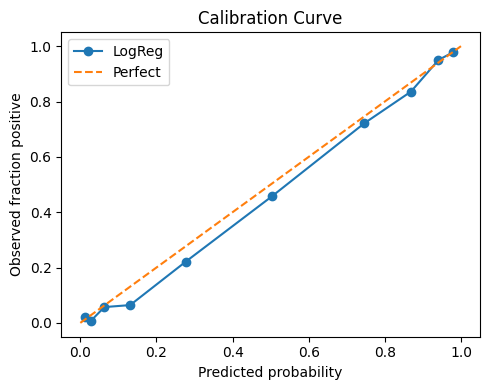

In [102]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='quantile')

plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', label='LogReg')
plt.plot([0,1],[0,1], '--', label='Perfect')
plt.xlabel("Predicted probability"); plt.ylabel("Observed fraction positive")
plt.title("Calibration Curve"); plt.legend(); plt.tight_layout(); plt.show()


# SVM

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# SVM with RBF kernel
svm_clf = SVC(
    kernel='rbf',
    C=20,                 # try 0.1, 1, 10 for tuning
    gamma='scale',         # 'auto' or specific value for tuning
    probability=True,      # needed for ROC-AUC
    class_weight='balanced',  # handles class imbalance
    random_state=42
)

# Train
svm_clf.fit(X_train, y_train)

# Predict
y_pred  = svm_clf.predict(X_test)
y_proba = svm_clf.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"SVM (RBF) — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


SVM (RBF) — Accuracy: 0.8479
Precision: 0.8050, Recall: 0.8543, F1: 0.8289, ROC-AUC: 0.9164

Classification report:
               precision    recall  f1-score   support

           0     0.8841    0.8430    0.8630       796
           1     0.8050    0.8543    0.8289       604

    accuracy                         0.8479      1400
   macro avg     0.8445    0.8486    0.8460      1400
weighted avg     0.8499    0.8479    0.8483      1400




Confusion Matrix (counts):
TN=671  FP=125
FN=88  TP=516
[[671 125]
 [ 88 516]]

Confusion Matrix (row-normalized):
[[0.843  0.157 ]
 [0.1457 0.8543]]


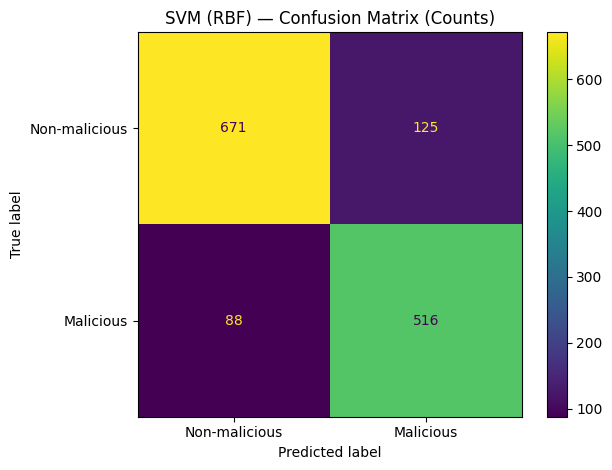

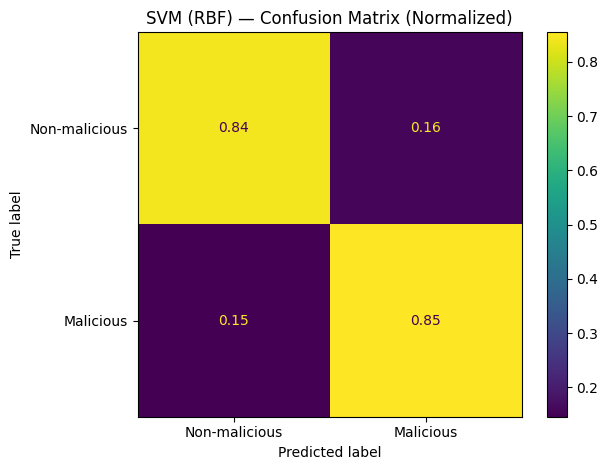

In [104]:
# --- Confusion Matrix ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# If your labels are 0=Non-malicious, 1=Malicious (as in your dataset):
labels = [0, 1]
label_names = ['Non-malicious', 'Malicious']

cm = confusion_matrix(y_test, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix (counts):")
print(f"TN={tn}  FP={fp}")
print(f"FN={fn}  TP={tp}")
print(cm)

# Normalized (row-wise: per-true-class)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
print("\nConfusion Matrix (row-normalized):")
print(np.round(cm_norm, 4))

# Plot counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(values_format='d')
plt.title("SVM (RBF) — Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

# Plot normalized
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=label_names)
disp_norm.plot(values_format='.2f', cmap=None)  # default colormap
plt.title("SVM (RBF) — Confusion Matrix (Normalized)")
plt.tight_layout()
plt.show()


In [105]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Train-set metrics
y_pred_tr  = svm_clf.predict(X_train)
y_proba_tr = svm_clf.predict_proba(X_train)[:, 1]
acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)
print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")


[Train] Acc=0.8329 Prec=0.7756 Rec=0.8617 F1=0.8164 AUC=0.9083


In [106]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(svm_clf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(svm_clf, X_train, y_train, scoring='f1',      cv=cv, n_jobs=-1)
print(f"CV AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"CV  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


CV AUC mean=0.9037 ± 0.0058
CV  F1 mean=0.8104 ± 0.0141


In [107]:
import pandas as pd, numpy as np
Xtr_df = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train)
tmp = Xtr_df.copy()
tmp['__y__'] = y_train.values if hasattr(y_train, 'values') else y_train
conflicts = tmp.groupby(list(Xtr_df.columns))['__y__'].nunique()
print("Conflicting duplicates (same features, different labels):", int((conflicts > 1).sum()))


Conflicting duplicates (same features, different labels): 0


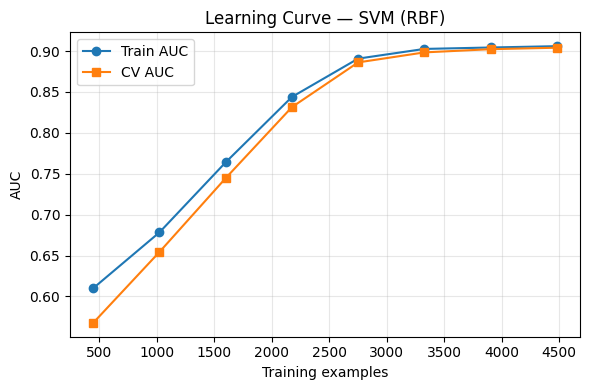

In [108]:
from sklearn.model_selection import learning_curve
import numpy as np, matplotlib.pyplot as plt

sizes, tr_scores, va_scores = learning_curve(
    estimator=svm_clf, X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8), cv=5,
    scoring='roc_auc', n_jobs=-1, shuffle=True, random_state=42
)
plt.figure(figsize=(6,4))
plt.plot(sizes, tr_scores.mean(axis=1), marker='o', label='Train AUC')
plt.plot(sizes, va_scores.mean(axis=1), marker='s', label='CV AUC')
plt.xlabel('Training examples'); plt.ylabel('AUC'); plt.title('Learning Curve — SVM (RBF)')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


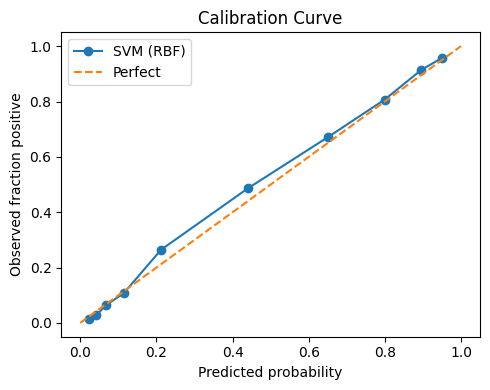

In [109]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='quantile')
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', label='SVM (RBF)')
plt.plot([0,1],[0,1],'--',label='Perfect')
plt.xlabel('Predicted probability'); plt.ylabel('Observed fraction positive')
plt.title('Calibration Curve'); plt.legend(); plt.tight_layout(); plt.show()



Top 20 features by permutation importance (AUC decrease):
alt_usb_descriptor         0.091122
vendor_id                  0.052144
drive_model                0.043056
product_id                 0.010716
power_mA                   0.007524
usb_speed                  0.006882
avg_process_runtime_sec    0.006810
keystroke_std_ms           0.004974
keystroke_mean_ms          0.001896
location_id                0.001742
device_description         0.000392
drive_interface            0.000365
source_type                0.000336
removable_drive            0.000286
manufacturer               0.000269
dtype: float64


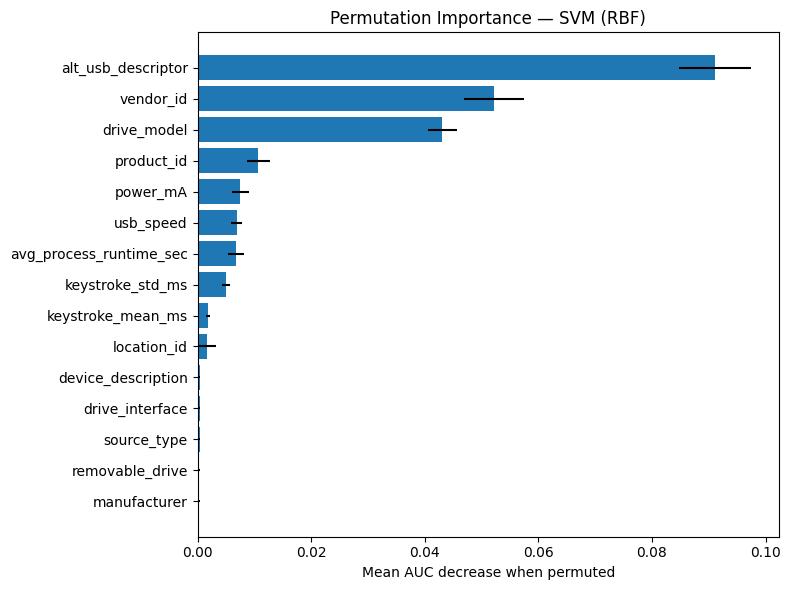

In [110]:
from sklearn.inspection import permutation_importance
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# Feature names
if hasattr(X_test, "columns"):
    feat_names = np.array(X_test.columns)
else:
    feat_names = np.array([f"f{i}" for i in range(X_test.shape[1])])

pi = permutation_importance(
    svm_clf, X_test, y_test,
    scoring='roc_auc', n_repeats=15, random_state=42, n_jobs=-1
)

imp = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
imp_std = pd.Series(pi.importances_std, index=feat_names).reindex(imp.index)

print("\nTop 20 features by permutation importance (AUC decrease):")
print(imp.head(20))

# Plot top 20 with error bars
topk = 20
plt.figure(figsize=(8,6))
plt.barh(imp.head(topk).index[::-1], imp.head(topk).values[::-1],
         xerr=imp_std.head(topk).values[::-1])
plt.xlabel('Mean AUC decrease when permuted')
plt.title('Permutation Importance — SVM (RBF)')
plt.tight_layout(); plt.show()


# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# Define KNN model
knn = KNeighborsClassifier(
    n_neighbors=15,      # you can tune: 5, 11, 15, 21
    weights='distance',  # 'uniform' or 'distance'
    metric='minkowski',  # Euclidean distance (p=2)
    p=1,
    n_jobs=-1
)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred  = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"KNN — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


KNN — Accuracy: 0.8464
Precision: 0.8394, Recall: 0.7964, F1: 0.8173, ROC-AUC: 0.9212

Classification Report:
               precision    recall  f1-score   support

           0     0.8513    0.8844    0.8675       796
           1     0.8394    0.7964    0.8173       604

    accuracy                         0.8464      1400
   macro avg     0.8454    0.8404    0.8424      1400
weighted avg     0.8462    0.8464    0.8459      1400




Confusion Matrix (counts):
TN=704  FP=92  FN=123  TP=481
[[704  92]
 [123 481]]

Sensitivity/Recall (TPR): 0.7964
Specificity (TNR):        0.8844
False Positive Rate:      0.1156
False Negative Rate:      0.2036

Confusion Matrix (row-normalized):
[[0.8844 0.1156]
 [0.2036 0.7964]]


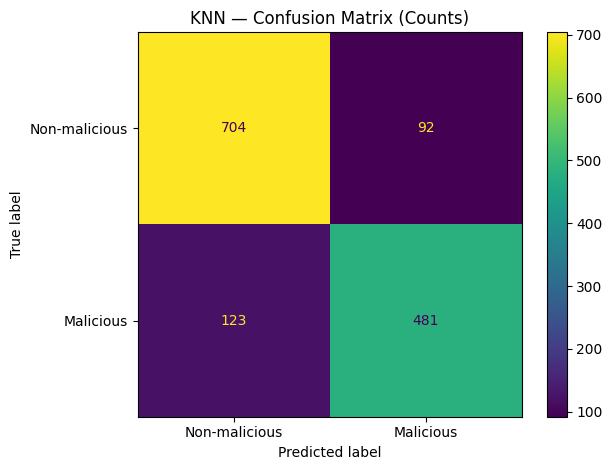

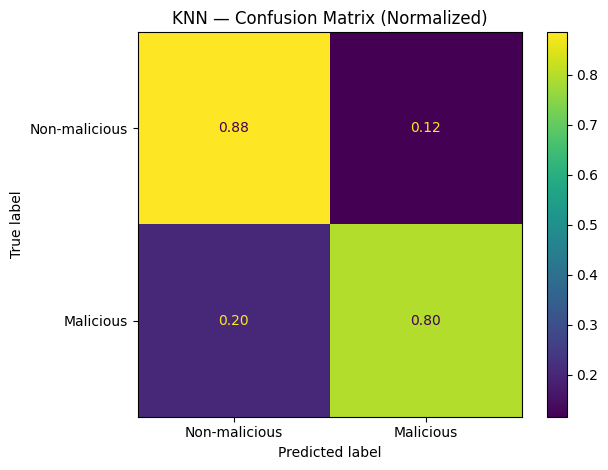

In [112]:
# --- Confusion Matrix for KNN ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# If your labels are 0=Non-malicious, 1=Malicious:
labels = [0, 1]
label_names = ['Non-malicious', 'Malicious']

cm = confusion_matrix(y_test, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix (counts):")
print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")
print(cm)

# Optional: useful rates derived from CM
tpr = tp / (tp + fn) if (tp + fn) else 0.0  # recall/sensitivity
tnr = tn / (tn + fp) if (tn + fp) else 0.0  # specificity
fpr = fp / (fp + tn) if (fp + tn) else 0.0
fnr = fn / (fn + tp) if (fn + tp) else 0.0
print(f"\nSensitivity/Recall (TPR): {tpr:.4f}")
print(f"Specificity (TNR):        {tnr:.4f}")
print(f"False Positive Rate:      {fpr:.4f}")
print(f"False Negative Rate:      {fnr:.4f}")

# Row-normalized CM (per true class)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)  # in case any row sum is 0
print("\nConfusion Matrix (row-normalized):")
print(np.round(cm_norm, 4))

# Plot counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(values_format='d')
plt.title("KNN — Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

# Plot normalized
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=label_names)
disp_norm.plot(values_format='.2f')
plt.title("KNN — Confusion Matrix (Normalized)")
plt.tight_layout()
plt.show()


[Train] Acc=1.0000 Prec=1.0000 Rec=1.0000 F1=1.0000 AUC=1.0000
[CV@train] AUC mean=0.9119 ± 0.0075
[CV@train]  F1 mean=0.8044 ± 0.0166


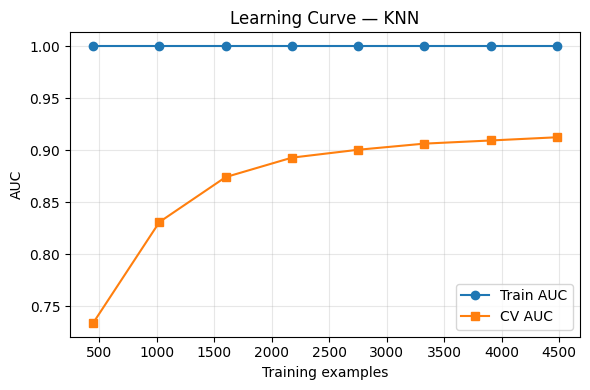

[Train, self-excluded] Majority-vote accuracy ≈ 0.8366  (lower than [Train] if memorizing)


In [113]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, LeaveOneOut
import numpy as np
import matplotlib.pyplot as plt

# 1) Train vs Test (note: KNN can look optimistic on train because a point is its own neighbor)
y_pred_tr  = knn.predict(X_train)
y_proba_tr = knn.predict_proba(X_train)[:, 1]
acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)
print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")

# 2) Stratified 5-Fold CV on TRAIN (expected generalization)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(knn, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(knn, X_train, y_train, scoring='f1',      cv=cv, n_jobs=-1)
print(f"[CV@train] AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"[CV@train]  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# 3) (Optional) Leave-One-Out CV = memorization stress test (can be slow on large data)
# loo = LeaveOneOut()
# loo_auc = cross_val_score(knn, X_train, y_train, scoring='roc_auc', cv=loo, n_jobs=-1)
# print(f"[LOOCV] AUC mean={loo_auc.mean():.4f}")

# 4) Learning curve (do we benefit from more data?)
sizes, tr_scores, va_scores = learning_curve(
    estimator=knn, X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8), cv=5,
    scoring='roc_auc', n_jobs=-1, shuffle=True, random_state=42
)
plt.figure(figsize=(6,4))
plt.plot(sizes, tr_scores.mean(axis=1), marker='o', label='Train AUC')
plt.plot(sizes, va_scores.mean(axis=1), marker='s', label='CV AUC')
plt.xlabel('Training examples'); plt.ylabel('AUC'); plt.title('Learning Curve — KNN')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# 5) Neighbor diagnostics (exclude self-neighbor to gauge “true” fit on train)
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=knn.n_neighbors+1, metric=knn.metric, p=getattr(knn, "p", 2)).fit(X_train)
dists, idxs = nbrs.kneighbors(X_train)
# drop self (position 0)
idxs_no_self = idxs[:, 1:]
# majority vote of neighbors' labels
y_train_arr = np.array(y_train)
maj_votes = (y_train_arr[idxs_no_self].mean(axis=1) >= 0.5).astype(int)
acc_loocv_like = (maj_votes == y_train_arr).mean()
print(f"[Train, self-excluded] Majority-vote accuracy ≈ {acc_loocv_like:.4f}  (lower than [Train] if memorizing)")



Top 20 features by permutation importance (AUC decrease):
alt_usb_descriptor         0.025140
vendor_id                  0.021283
product_id                 0.014173
drive_model                0.013633
usb_speed                  0.008351
power_mA                   0.006555
keystroke_std_ms           0.006530
avg_process_runtime_sec    0.006147
keystroke_mean_ms          0.004857
manufacturer               0.001466
source_type                0.001097
drive_interface            0.000947
removable_drive            0.000803
device_description         0.000793
location_id               -0.000971
dtype: float64


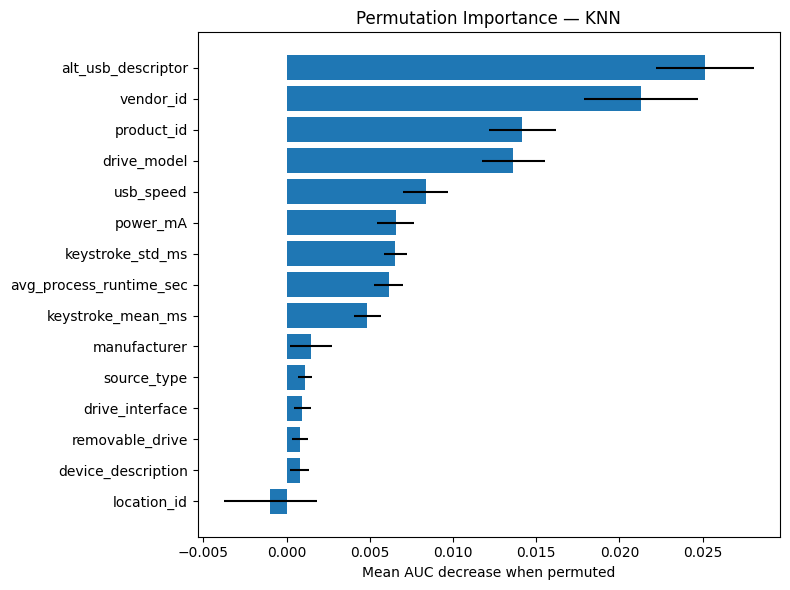

In [114]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Feature names
if hasattr(X_test, "columns"):
    feat_names = np.array(X_test.columns)
else:
    feat_names = np.array([f"f{i}" for i in range(X_test.shape[1])])

pi = permutation_importance(
    knn, X_test, y_test,
    scoring='roc_auc', n_repeats=15, random_state=42, n_jobs=-1
)

imp = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
imp_std = pd.Series(pi.importances_std, index=feat_names).reindex(imp.index)

print("\nTop 20 features by permutation importance (AUC decrease):")
print(imp.head(20))

# Plot top-20 with error bars
topk = 20
plt.figure(figsize=(8,6))
plt.barh(imp.head(topk).index[::-1], imp.head(topk).values[::-1],
         xerr=imp_std.head(topk).values[::-1])
plt.xlabel('Mean AUC decrease when permuted')
plt.title('Permutation Importance — KNN')
plt.tight_layout(); plt.show()


# XGBoost

XGBoost — Accuracy: 0.8779
Precision: 0.8431, Recall: 0.8808, F1: 0.8615, ROC-AUC: 0.9495

Classification Report:
               precision    recall  f1-score   support

           0     0.9064    0.8756    0.8907       796
           1     0.8431    0.8808    0.8615       604

    accuracy                         0.8779      1400
   macro avg     0.8747    0.8782    0.8761      1400
weighted avg     0.8791    0.8779    0.8781      1400


Top 20 features by gain:
                     feature       gain
10              drive_model  36.684799
14         keystroke_std_ms  14.880549
1                 vendor_id  13.518064
8        alt_usb_descriptor  12.935932
2                product_id   8.297053
11          drive_interface   6.755321
12          removable_drive   6.104827
5                 usb_speed   5.598774
0        device_description   4.886635
9               source_type   4.745465
13        keystroke_mean_ms   4.105994
7   avg_process_runtime_sec   3.815077
6                  power

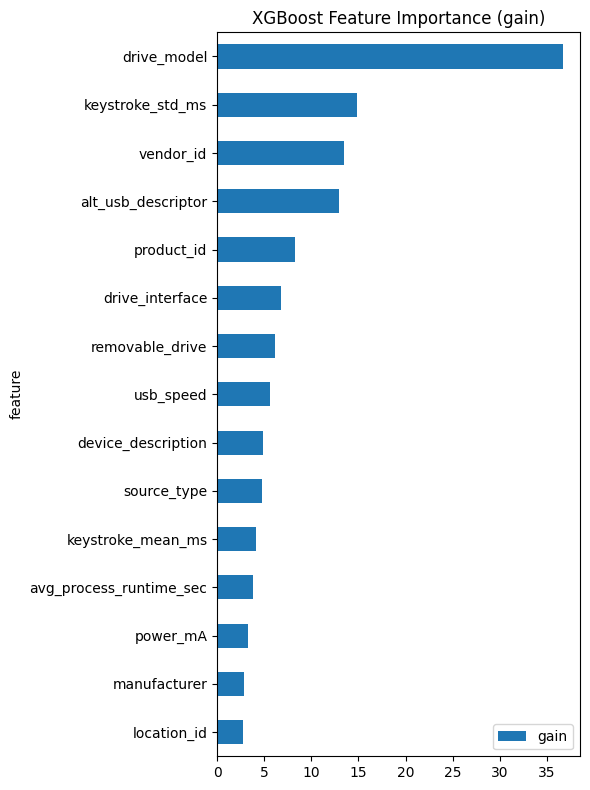

In [115]:
import numpy as np, xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# ---- keep your existing train/test split; we create a separate VALIDATION set for early stopping
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# ---- class weight for imbalance
pos = (y_tr == 1).sum()
neg = (y_tr == 0).sum()
scale_pos_weight = float(neg / max(pos, 1))

# ---- map params to core API
params = {
    "eta": 0.05,
    "max_depth": 6,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "gamma": 0.0,
    "alpha": 0.0,
    "lambda": 1.0,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "tree_method": "hist",            # use "gpu_hist" if you enabled GPU in Colab
    "seed": 42,
    "scale_pos_weight": scale_pos_weight,
}

# ---- DMatrix (works regardless of xgboost version)
dtr = xgb.DMatrix(X_tr, label=y_tr)
dva = xgb.DMatrix(X_va, label=y_va)
dte = xgb.DMatrix(X_test)

# ---- train with early stopping WITHOUT callbacks/kwargs on sklearn wrapper
bst = xgb.train(
    params,
    dtr,
    num_boost_round=2000,
    evals=[(dtr, "train"), (dva, "valid")],
    early_stopping_rounds=100,
    verbose_eval=False,
)

# ---- predict using best iteration (works across versions)
best_it = getattr(bst, "best_iteration", None)

def predict_proba_robust(bst, data):
    """data can be a DMatrix or raw array; tries new API then old."""
    # Ensure DMatrix
    dm = data if isinstance(data, xgb.DMatrix) else xgb.DMatrix(data)

    if best_it is not None:
        # New API (XGBoost >= 2.0)
        try:
            return bst.predict(dm, iteration_range=(0, best_it + 1))
        except TypeError:
            pass
        # Old API (XGBoost < 2.0)
        try:
            return bst.predict(dm, ntree_limit=best_it + 1)
        except TypeError:
            pass

    # Fallback: no early-stopping info available
    return bst.predict(dm)

y_proba = predict_proba_robust(bst, dte)   # or X_test
y_pred  = (y_proba >= 0.5).astype(int)


# ---- metrics
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"XGBoost — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ---- (optional) feature importance by gain
try:
    import pandas as pd, matplotlib.pyplot as plt
    fmap = None
    if hasattr(X_train, "columns"):
        # create a feature map to preserve names
        feat_names = list(X_train.columns)
        fmap = {i: n for i, n in enumerate(feat_names)}
    scores = bst.get_score(importance_type="gain")
    # map f0..fn to names if available
    rows = []
    for k, v in scores.items():
        if k.startswith("f") and fmap is not None:
            idx = int(k[1:])
            rows.append((fmap.get(idx, k), v))
        else:
            rows.append((k, v))
    imp_df = pd.DataFrame(rows, columns=["feature", "gain"]).sort_values("gain", ascending=False)
    print("\nTop 20 features by gain:\n", imp_df.head(20))
    ax = imp_df.head(20).plot(kind="barh", x="feature", y="gain", figsize=(6,8))
    ax.invert_yaxis()
    ax.set_title("XGBoost Feature Importance (gain)")
    plt.tight_layout(); plt.show()
except Exception as e:
    print("Skipped importance plot:", e)



Confusion Matrix (counts):
TN=688  FP=108  FN=107  TP=497
[[688 108]
 [107 497]]

Sensitivity/Recall (TPR): 0.8228
Specificity (TNR):        0.8643
False Positive Rate:      0.1357
False Negative Rate:      0.1772

Confusion Matrix (row-normalized):
[[0.8643 0.1357]
 [0.1772 0.8228]]


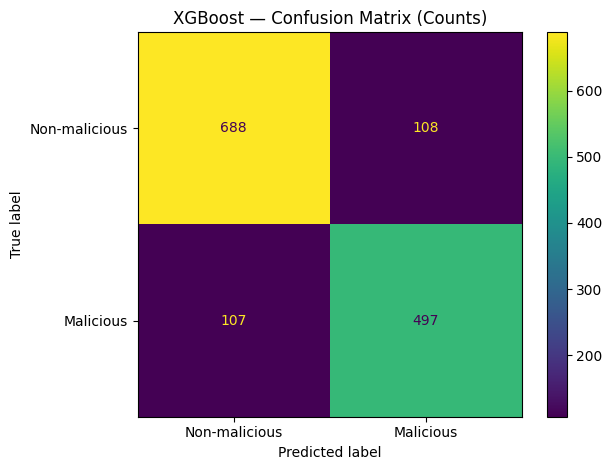

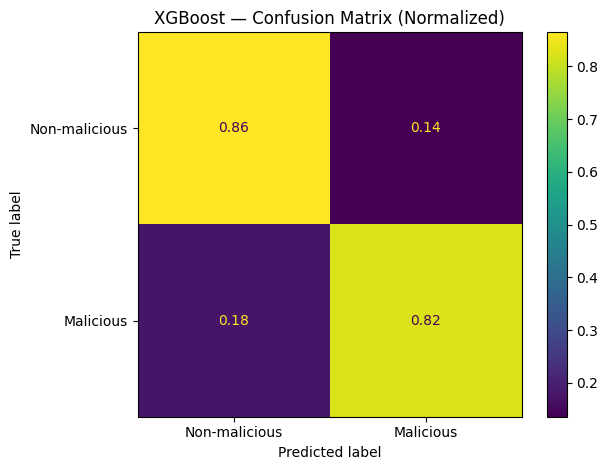

In [134]:
# --- Confusion Matrix for XGBoost ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# If your labels are 0=Non-malicious, 1=Malicious:
labels = [0, 1]
label_names = ['Non-malicious', 'Malicious']

cm = confusion_matrix(y_test, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix (counts):")
print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")
print(cm)

# Optional: rates derived from CM
tpr = tp / (tp + fn) if (tp + fn) else 0.0  # recall/sensitivity
tnr = tn / (tn + fp) if (tn + fp) else 0.0  # specificity
fpr = fp / (fp + tn) if (fp + tn) else 0.0
fnr = fn / (fn + tp) if (fn + tp) else 0.0
print(f"\nSensitivity/Recall (TPR): {tpr:.4f}")
print(f"Specificity (TNR):        {tnr:.4f}")
print(f"False Positive Rate:      {fpr:.4f}")
print(f"False Negative Rate:      {fnr:.4f}")

# Row-normalized (per true class)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)  # in case any row sum is 0
print("\nConfusion Matrix (row-normalized):")
print(np.round(cm_norm, 4))

# Plot counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(values_format='d')
plt.title("XGBoost — Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

# Plot normalized
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=label_names)
disp_norm.plot(values_format='.2f')
plt.title("XGBoost — Confusion Matrix (Normalized)")
plt.tight_layout()
plt.show()


In [116]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# helper that respects best_iteration across versions
def predict_proba_best(bst, X):
    dm = X if isinstance(X, xgb.DMatrix) else xgb.DMatrix(X)
    best_it = getattr(bst, "best_iteration", None)
    if best_it is not None:
        # New API (>=2.0)
        try:
            return bst.predict(dm, iteration_range=(0, best_it + 1))
        except TypeError:
            # Old API (<2.0)
            return bst.predict(dm, ntree_limit=best_it + 1)
    # No early stopping info
    return bst.predict(dm)

def bin_metrics(y_true, y_proba, thresh=0.5, label="[set]"):
    y_pred = (y_proba >= thresh).astype(int)
    acc  = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    auc  = roc_auc_score(y_true, y_proba)
    print(f"{label} Acc={acc:.4f} Prec={prec:.4f} Rec={rec:.4f} F1={f1:.4f} AUC={auc:.4f}")

# === Train subset used to fit (X_tr, y_tr) ===
y_proba_tr = predict_proba_best(bst, X_tr)
bin_metrics(y_tr, y_proba_tr, label="[Train]")

# === Validation subset used for early stopping (X_va, y_va) ===
y_proba_va = predict_proba_best(bst, X_va)
bin_metrics(y_va, y_proba_va, label="[Valid]")

# === Test set (X_test, y_test) ===
y_proba_te = predict_proba_best(bst, X_test)
bin_metrics(y_test, y_proba_te, label="[Test]")


[Train] Acc=0.9241 Prec=0.8937 Rec=0.9353 F1=0.9140 AUC=0.9780
[Valid] Acc=0.8545 Prec=0.8125 Rec=0.8613 F1=0.8362 AUC=0.9344
[Test] Acc=0.8779 Prec=0.8431 Rec=0.8808 F1=0.8615 AUC=0.9495


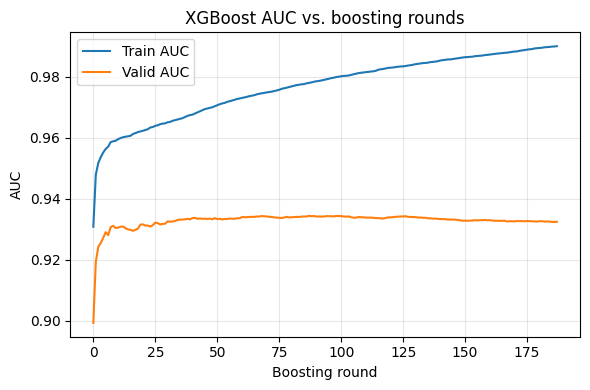

Best iteration: 87
Best valid AUC at best_iteration: 0.9344072076991332
Best (reported) score: 0.9344072076991332


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# ---- re-train capturing eval history
results = {}
bst = xgb.train(
    params,
    dtr,
    num_boost_round=2000,
    evals=[(dtr, "train"), (dva, "valid")],   # add (dte,"test") too if you want a test curve
    early_stopping_rounds=100,
    evals_result=results,                      # <-- collect history here
    verbose_eval=False,
)

# ---- extract AUC curves
train_auc = results["train"]["auc"]
valid_auc = results["valid"]["auc"]

plt.figure(figsize=(6,4))
plt.plot(train_auc, label="Train AUC")
plt.plot(valid_auc, label="Valid AUC")
plt.xlabel("Boosting round"); plt.ylabel("AUC")
plt.title("XGBoost AUC vs. boosting rounds")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---- best iteration (robust)
best_it = getattr(bst, "best_iteration", None)
if best_it is None:
    best_it = int(np.argmax(valid_auc))
best_score = getattr(bst, "best_score", float(np.max(valid_auc)))

print("Best iteration:", best_it)
print("Best valid AUC at best_iteration:", valid_auc[best_it])
print("Best (reported) score:", best_score)


In [118]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores, f1_scores = [], []

for tr_idx, va_idx in cv.split(X_train, y_train):
    X_tr = X_train.iloc[tr_idx] if hasattr(X_train, "iloc") else X_train[tr_idx]
    X_va = X_train.iloc[va_idx] if hasattr(X_train, "iloc") else X_train[va_idx]
    y_tr = y_train.iloc[tr_idx] if hasattr(y_train, "iloc") else y_train[tr_idx]
    y_va = y_train.iloc[va_idx] if hasattr(y_train, "iloc") else y_train[va_idx]

    # compute class weight per fold
    pos = (y_tr == 1).sum(); neg = (y_tr == 0).sum()
    spw = float(neg / max(pos, 1))

    clf = XGBClassifier(
        n_estimators=2000, learning_rate=0.05, max_depth=6, min_child_weight=2,
        subsample=0.8, colsample_bytree=0.8, gamma=0.0, reg_alpha=0.0, reg_lambda=1.0,
        objective="binary:logistic", eval_metric="auc", tree_method="hist",
        random_state=42, n_jobs=-1, scale_pos_weight=spw
    )

    # Try early stopping; fall back gracefully on older versions
    fit_kwargs = {"eval_set": [(X_va, y_va)], "verbose": False}
    try:
        clf.fit(**{"X": X_tr, "y": y_tr, "early_stopping_rounds": 100, **fit_kwargs})
    except TypeError:
        # No early_stopping_rounds support in this version — fit without it
        clf.fit(X_tr, y_tr, **fit_kwargs)

    proba = clf.predict_proba(X_va)[:, 1]
    pred  = clf.predict(X_va)
    auc_scores.append(roc_auc_score(y_va, proba))
    f1_scores.append(f1_score(y_va, pred))

print(f"[CV-ES] AUC mean={np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
print(f"[CV-ES]  F1 mean={np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


[CV-ES] AUC mean=0.9310 ± 0.0039
[CV-ES]  F1 mean=0.8391 ± 0.0081


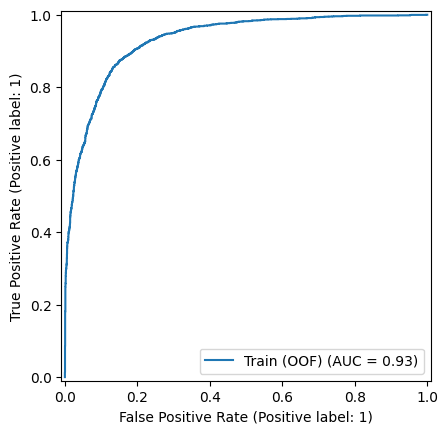

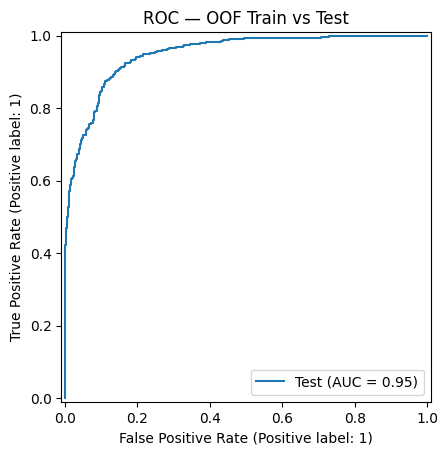

In [119]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
proba_oof = np.zeros(len(y_train))

for tr_idx, va_idx in cv.split(X_train, y_train):
    X_tr = X_train.iloc[tr_idx] if hasattr(X_train, "iloc") else X_train[tr_idx]
    X_va = X_train.iloc[va_idx] if hasattr(X_train, "iloc") else X_train[va_idx]
    y_tr = y_train.iloc[tr_idx] if hasattr(y_train, "iloc") else y_train[tr_idx]
    y_va = y_train.iloc[va_idx] if hasattr(y_train, "iloc") else y_train[va_idx]

    spw = float((y_tr==0).sum()/max((y_tr==1).sum(),1))
    clf = XGBClassifier(
        n_estimators=2000, learning_rate=0.05, max_depth=6, min_child_weight=2,
        subsample=0.8, colsample_bytree=0.8, gamma=0.0, reg_alpha=0.0, reg_lambda=1.0,
        objective="binary:logistic", eval_metric="auc", tree_method="hist",
        random_state=42, n_jobs=-1, scale_pos_weight=spw
    )

    # try early stopping; fall back if unsupported
    try:
        clf.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], early_stopping_rounds=100, verbose=False)
    except TypeError:
        clf.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)

    proba_oof[va_idx] = clf.predict_proba(X_va)[:, 1]

# Now proba_oof aligns with y_train 1:1
RocCurveDisplay.from_predictions(y_train, proba_oof, name='Train (OOF)')
RocCurveDisplay.from_predictions(y_test,  y_proba,   name='Test')
plt.title('ROC — OOF Train vs Test')
plt.show()


In [120]:
import pandas as pd, numpy as np
Xtr_df = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train)
tmp = Xtr_df.copy()
tmp['__y__'] = y_train.values if hasattr(y_train,'values') else y_train
conflicts = tmp.groupby(list(Xtr_df.columns))['__y__'].nunique()
print("Conflicting duplicates in train:", int((conflicts > 1).sum()))


Conflicting duplicates in train: 0


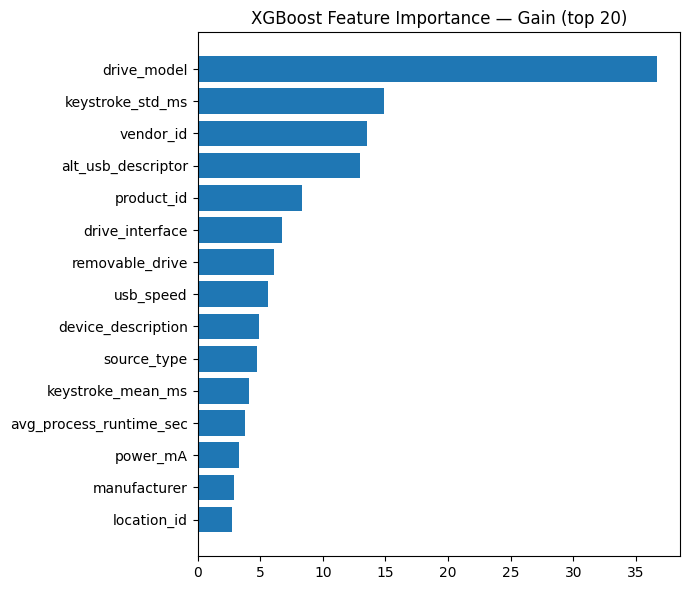


Top 20 (gain):
                     feature       gain
10              drive_model  36.684799
14         keystroke_std_ms  14.880549
1                 vendor_id  13.518064
8        alt_usb_descriptor  12.935932
2                product_id   8.297053
11          drive_interface   6.755321
12          removable_drive   6.104827
5                 usb_speed   5.598774
0        device_description   4.886635
9               source_type   4.745465
13        keystroke_mean_ms   4.105994
7   avg_process_runtime_sec   3.815077
6                  power_mA   3.271575
3              manufacturer   2.899570
4               location_id   2.729560


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

booster = bst  # your trained Booster

if hasattr(X_train, "columns"):
    feat_names = np.array(list(X_train.columns))
else:
    feat_names = np.array([f"f{i}" for i in range(X_train.shape[1])])

def make_importance_df(importance_type="gain"):
    raw = booster.get_score(importance_type=importance_type)
    rows = []
    for k, v in raw.items():
        if k.startswith("f"):
            idx = int(k[1:])
            name = feat_names[idx] if idx < len(feat_names) else k
        else:
            name = k
        rows.append((name, v))
    return pd.DataFrame(rows, columns=["feature", importance_type]).sort_values(importance_type, ascending=False)

gain_df  = make_importance_df("gain")
top = gain_df.head(20)
plt.figure(figsize=(7,6))
plt.barh(top["feature"][::-1], top["gain"][::-1])
plt.title("XGBoost Feature Importance — Gain (top 20)")
plt.tight_layout(); plt.show()

print("\nTop 20 (gain):\n", top)



Permutation importance (top 20):
 drive_model                0.023666
keystroke_std_ms           0.016088
vendor_id                  0.010171
alt_usb_descriptor         0.010143
product_id                 0.007056
avg_process_runtime_sec    0.006180
keystroke_mean_ms          0.004699
power_mA                   0.003474
usb_speed                  0.002932
drive_interface            0.002178
source_type                0.001126
manufacturer               0.000840
device_description         0.000575
removable_drive            0.000079
location_id               -0.000068
dtype: float64


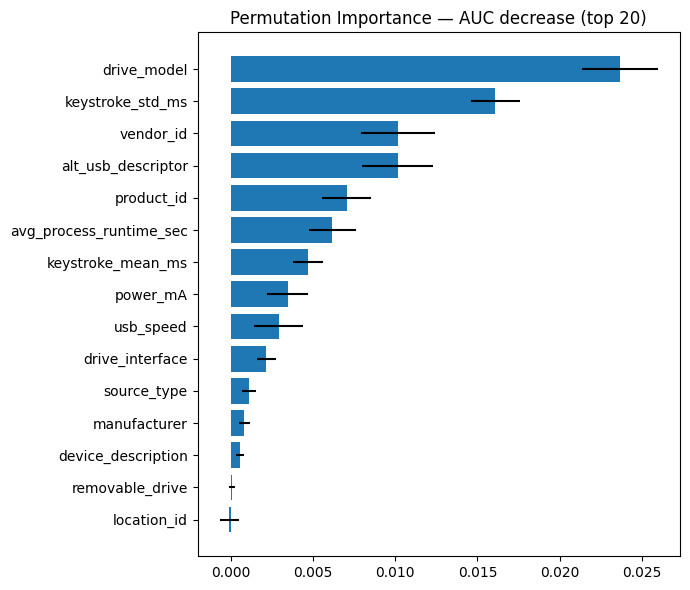

In [122]:
import xgboost as xgb
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

class BoosterEstimator(BaseEstimator, ClassifierMixin):
    _estimator_type = "classifier"

    def __init__(self, booster):
        self.booster = booster
        self.best_it = getattr(booster, "best_iteration", None)
        self.classes_ = np.array([0, 1])

    def fit(self, X, y):  # no-op: Booster is already trained
        return self

    def _proba(self, X):
        dm = X if isinstance(X, xgb.DMatrix) else xgb.DMatrix(X)
        if self.best_it is not None:
            try:
                p = self.booster.predict(dm, iteration_range=(0, self.best_it + 1))
            except TypeError:
                p = self.booster.predict(dm, ntree_limit=self.best_it + 1)
        else:
            p = self.booster.predict(dm)
        return np.c_[1 - p, p]

    def predict_proba(self, X):
        return self._proba(X)

    def predict(self, X):
        return (self._proba(X)[:, 1] >= 0.5).astype(int)

    def score(self, X, y):  # <-- make it a proper "classifier" for sklearn
        return roc_auc_score(y, self.predict_proba(X)[:, 1])

estimator = BoosterEstimator(bst).fit(X_train, y_train)

pi = permutation_importance(
    estimator, X_test, y_test,
    scoring=None,                # <-- use our .score() (AUC)
    n_repeats=15, random_state=42, n_jobs=-1
)

feat_names = np.array(X_test.columns) if hasattr(X_test, "columns") else np.array([f"f{i}" for i in range(X_test.shape[1])])
pi_mean = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
pi_std  = pd.Series(pi.importances_std,  index=feat_names).reindex(pi_mean.index)

print("\nPermutation importance (top 20):\n", pi_mean.head(20))

plt.figure(figsize=(7,6))
plt.barh(pi_mean.head(20).index[::-1], pi_mean.head(20).values[::-1],
         xerr=pi_std.head(20).values[::-1])
plt.title("Permutation Importance — AUC decrease (top 20)")
plt.tight_layout(); plt.show()


 89%|==================  | 1246/1400 [00:11<00:01]       

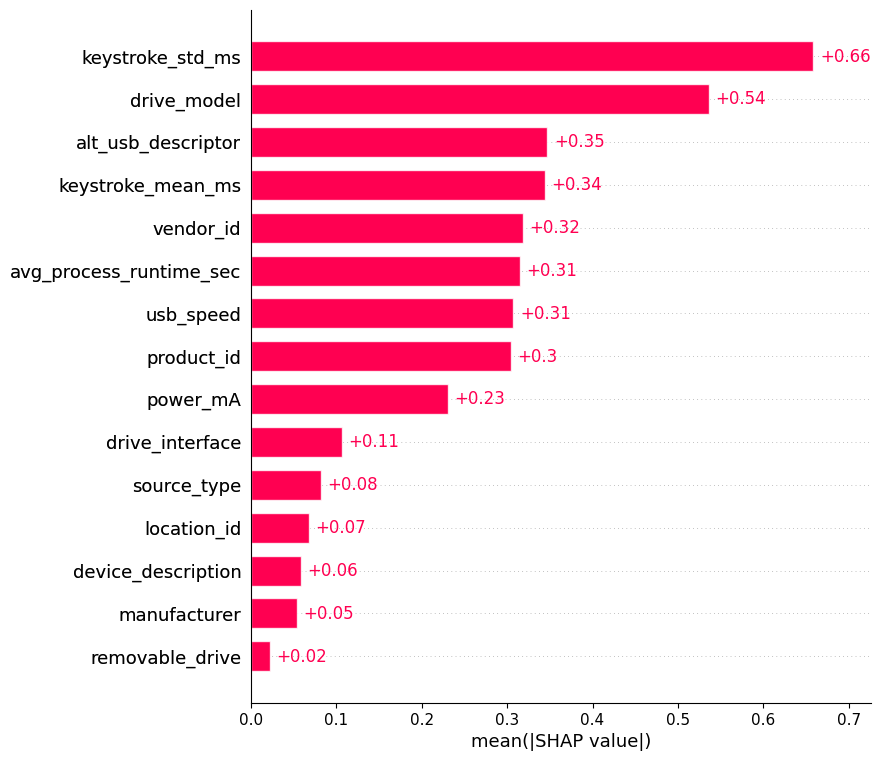

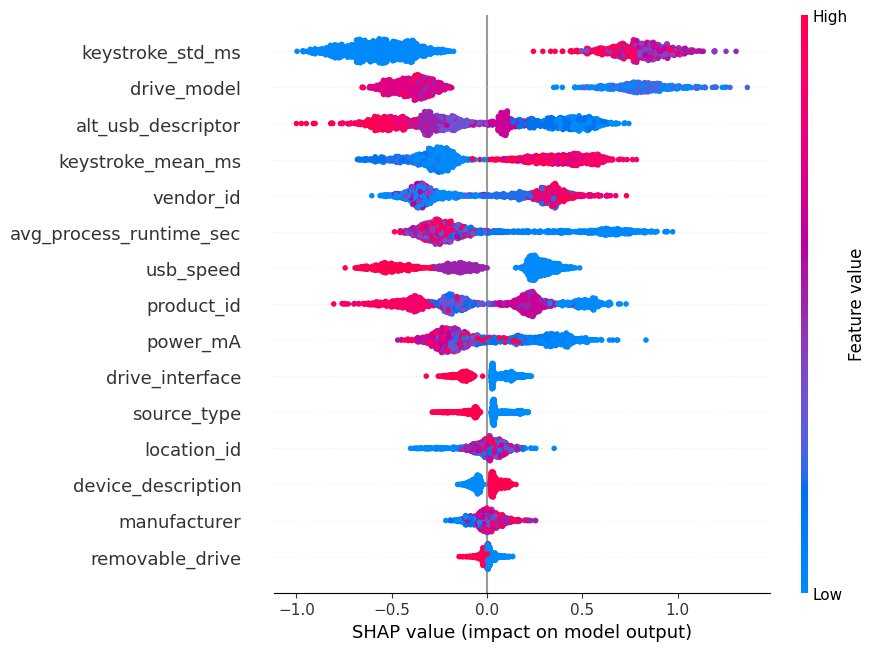

In [123]:
# !pip install shap  # if needed
import shap, numpy as np, matplotlib.pyplot as plt

bg = X_train.sample(min(200, len(X_train)), random_state=42) if hasattr(X_train, "sample") else X_train[:200]

explainer = shap.TreeExplainer(bst, data=bg)  # bst is your Booster

try:
    exp = explainer(X_test)
    shap.plots.bar(exp, max_display=20)
    shap.plots.beeswarm(exp, max_display=20)
except Exception:
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=getattr(X_test, "columns", None), plot_type='bar')
    shap.summary_plot(shap_values, X_test, feature_names=getattr(X_test, "columns", None))


# Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report
import numpy as np

# --- Model (regularized to reduce overfitting) ---
dt = DecisionTreeClassifier(
    criterion="gini",          # or "entropy", "log_loss"
    max_depth=8,               # tune: 4–12
    min_samples_split=60,      # tune: 10–100
    min_samples_leaf=20,       # tune: 5–50
    max_features=None,         # or "sqrt"/"log2"
    class_weight="balanced",   # handles imbalance
    random_state=42
)

# --- Train ---
dt.fit(X_train, y_train)

# --- Predict ---
y_pred  = dt.predict(X_test)
# Probability for ROC-AUC
y_proba = dt.predict_proba(X_test)[:, 1] if hasattr(dt, "predict_proba") else np.zeros_like(y_pred, dtype=float)

# --- Metrics (same style as you used) ---
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"DecisionTree — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# --- Quick feature importances ---
try:
    import pandas as pd
    if hasattr(X_train, "columns"):
        feat_names = X_train.columns
    else:
        feat_names = [f"f{i}" for i in range(X_train.shape[1])]
    importances = pd.Series(dt.feature_importances_, index=feat_names).sort_values(ascending=False)
    print("\nTop 20 features:\n", importances.head(20))
except Exception as e:
    print("Skipped importance print:", e)

# --- Optional: human-readable rules (truncated) ---
try:
    rules = export_text(dt, feature_names=list(feat_names))
    print("\nTree rules (first 2000 chars):\n", rules[:2000])
except Exception:
    pass


DecisionTree — Accuracy: 0.8650
Precision: 0.8396, Recall: 0.8493, F1: 0.8444, ROC-AUC: 0.9315

Classification Report:
               precision    recall  f1-score   support

           0     0.8847    0.8769    0.8808       796
           1     0.8396    0.8493    0.8444       604

    accuracy                         0.8650      1400
   macro avg     0.8621    0.8631    0.8626      1400
weighted avg     0.8652    0.8650    0.8651      1400


Top 20 features:
 keystroke_std_ms           0.468268
drive_model                0.226838
product_id                 0.087754
alt_usb_descriptor         0.080610
vendor_id                  0.059291
avg_process_runtime_sec    0.029636
keystroke_mean_ms          0.018706
power_mA                   0.011938
usb_speed                  0.009541
location_id                0.004945
manufacturer               0.002474
device_description         0.000000
source_type                0.000000
removable_drive            0.000000
drive_interface            0.0


Confusion Matrix (counts):
TN=688  FP=108  FN=107  TP=497
[[688 108]
 [107 497]]

Sensitivity/Recall (TPR): 0.8228
Specificity (TNR):        0.8643
False Positive Rate:      0.1357
False Negative Rate:      0.1772
Precision (PPV):          0.8215
Negative Predictive Val.: 0.8654

Confusion Matrix (row-normalized):
[[0.8643 0.1357]
 [0.1772 0.8228]]


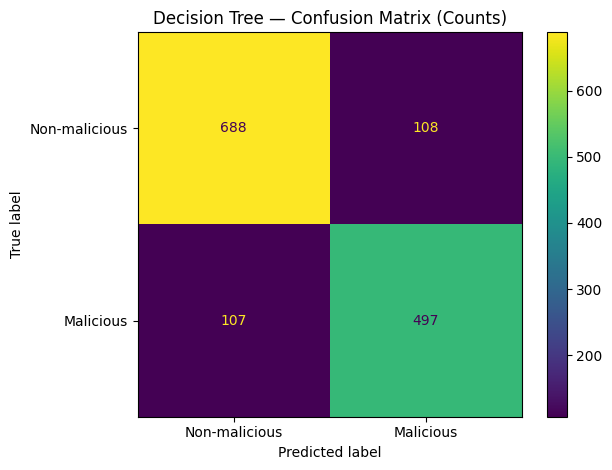

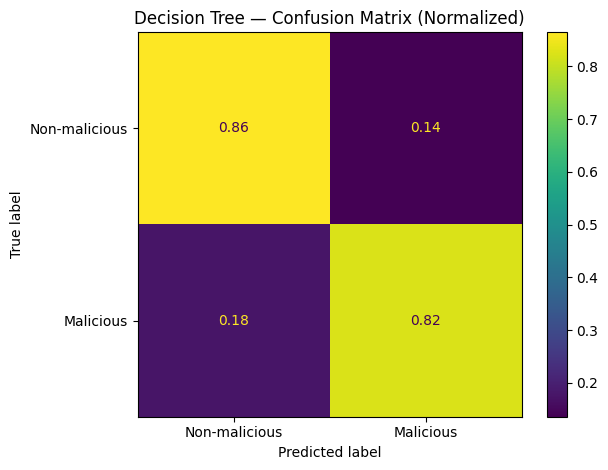

In [135]:
# --- Confusion Matrix for Decision Tree ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# If your labels are 0=Non-malicious, 1=Malicious:
labels = [0, 1]
label_names = ['Non-malicious', 'Malicious']

cm = confusion_matrix(y_test, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix (counts):")
print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")
print(cm)

# Useful rates derived from CM
tpr = tp / (tp + fn) if (tp + fn) else 0.0  # recall/sensitivity
tnr = tn / (tn + fp) if (tn + fp) else 0.0  # specificity
fpr = fp / (fp + tn) if (fp + tn) else 0.0
fnr = fn / (fn + tp) if (fn + tp) else 0.0
ppv = tp / (tp + fp) if (tp + fp) else 0.0  # precision/PPV
npv = tn / (tn + fn) if (tn + fn) else 0.0  # NPV

print(f"\nSensitivity/Recall (TPR): {tpr:.4f}")
print(f"Specificity (TNR):        {tnr:.4f}")
print(f"False Positive Rate:      {fpr:.4f}")
print(f"False Negative Rate:      {fnr:.4f}")
print(f"Precision (PPV):          {ppv:.4f}")
print(f"Negative Predictive Val.: {npv:.4f}")

# Row-normalized matrix (per true class)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)  # guard against divide-by-zero
print("\nConfusion Matrix (row-normalized):")
print(np.round(cm_norm, 4))

# Plot: counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(values_format='d')
plt.title("Decision Tree — Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

# Plot: normalized
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=label_names)
disp_norm.plot(values_format='.2f')
plt.title("Decision Tree — Confusion Matrix (Normalized)")
plt.tight_layout()
plt.show()


In [125]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

y_pred_tr  = dt.predict(X_train)
y_proba_tr = dt.predict_proba(X_train)[:, 1]

acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average="binary", zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)

print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")


[Train] Acc=0.8768 Prec=0.8449 Rec=0.8749 F1=0.8596 AUC=0.9519


In [126]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(dt, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(dt, X_train, y_train, scoring="f1",      cv=cv, n_jobs=-1)
print(f"[CV] AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"[CV]  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


[CV] AUC mean=0.9205 ± 0.0080
[CV]  F1 mean=0.8274 ± 0.0089


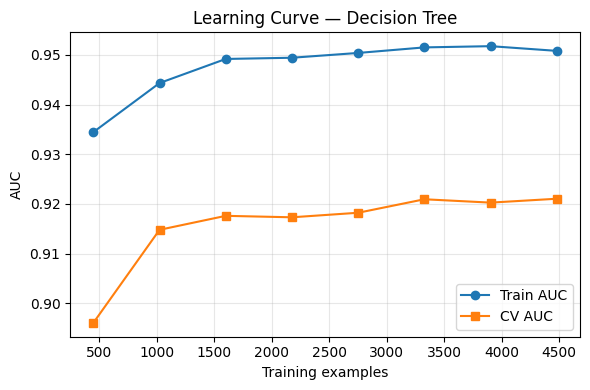

In [127]:
from sklearn.model_selection import learning_curve
import numpy as np, matplotlib.pyplot as plt

sizes, tr, va = learning_curve(dt, X_train, y_train,
                               train_sizes=np.linspace(0.1,1.0,8),
                               cv=5, scoring="roc_auc",
                               shuffle=True, random_state=42, n_jobs=-1)
plt.figure(figsize=(6,4))
plt.plot(sizes, tr.mean(axis=1), marker="o", label="Train AUC")
plt.plot(sizes, va.mean(axis=1), marker="s", label="CV AUC")
plt.xlabel("Training examples"); plt.ylabel("AUC")
plt.title("Learning Curve — Decision Tree")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


In [128]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

path = DecisionTreeClassifier(random_state=42, class_weight="balanced").cost_complexity_pruning_path(X_train, y_train)
ccp_grid = np.linspace(path.ccp_alphas.min(), path.ccp_alphas.max(), 20)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_means = []
for a in ccp_grid:
    m = DecisionTreeClassifier(random_state=42, class_weight="balanced", ccp_alpha=a)
    auc_cv = cross_val_score(m, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
    cv_means.append(auc_cv.mean())

best_alpha = float(ccp_grid[int(np.argmax(cv_means))])
print(f"Selected ccp_alpha via CV: {best_alpha:.6f} (CV AUC={max(cv_means):.4f})")

dt = DecisionTreeClassifier(random_state=42, class_weight="balanced", ccp_alpha=best_alpha).fit(X_train, y_train)

y_pred  = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)
print(f"Decision Tree — Acc={acc:.4f} Prec={prec:.4f} Rec={rec:.4f} F1={f1:.4f} AUC={auc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


Selected ccp_alpha via CV: 0.007828 (CV AUC=0.8937)
Decision Tree — Acc=0.8464 Prec=0.8215 Rec=0.8228 F1=0.8222 AUC=0.8945

Classification report:
               precision    recall  f1-score   support

           0     0.8654    0.8643    0.8649       796
           1     0.8215    0.8228    0.8222       604

    accuracy                         0.8464      1400
   macro avg     0.8434    0.8436    0.8435      1400
weighted avg     0.8465    0.8464    0.8464      1400



In [129]:
import pandas as pd, numpy as np
Xtr_df = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train)
tmp = Xtr_df.copy()
tmp["__y__"] = y_train.values if hasattr(y_train,"values") else y_train
conflicts = tmp.groupby(list(Xtr_df.columns))["__y__"].nunique()
print("Conflicting duplicates in train:", int((conflicts > 1).sum()))


Conflicting duplicates in train: 0


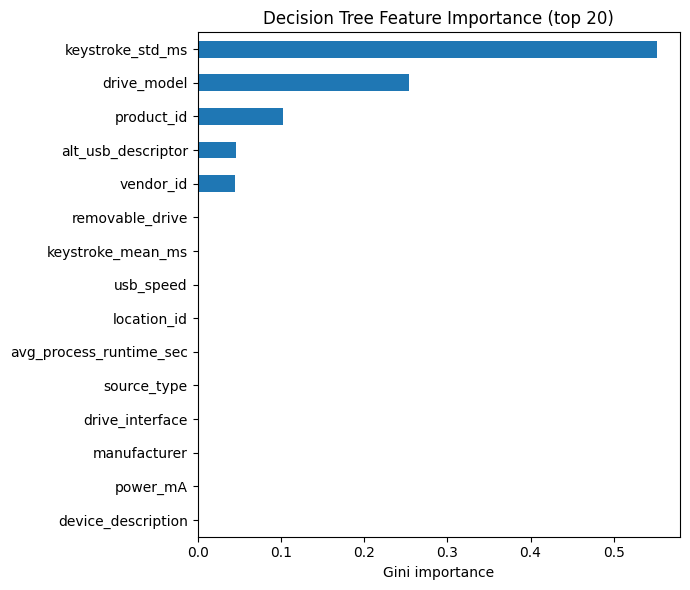


Top 20 features:
 keystroke_std_ms           0.551927
drive_model                0.253609
product_id                 0.103190
alt_usb_descriptor         0.045854
vendor_id                  0.045420
manufacturer               0.000000
device_description         0.000000
power_mA                   0.000000
usb_speed                  0.000000
location_id                0.000000
avg_process_runtime_sec    0.000000
source_type                0.000000
drive_interface            0.000000
removable_drive            0.000000
keystroke_mean_ms          0.000000
dtype: float64


In [130]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

feat_names = np.array(X_train.columns) if hasattr(X_train, "columns") \
             else np.array([f"f{i}" for i in range(X_train.shape[1])])

imp = pd.Series(dt.feature_importances_, index=feat_names).sort_values(ascending=False)

topk = 20
plt.figure(figsize=(7,6))
imp.head(topk).sort_values().plot(kind="barh")
plt.xlabel("Gini importance"); plt.title("Decision Tree Feature Importance (top 20)")
plt.tight_layout(); plt.show()

print("\nTop 20 features:\n", imp.head(topk))



Permutation Importance (top 20):
 keystroke_std_ms           0.146392
drive_model                0.092270
product_id                 0.049702
vendor_id                  0.035083
alt_usb_descriptor         0.012436
manufacturer               0.000000
device_description         0.000000
power_mA                   0.000000
usb_speed                  0.000000
location_id                0.000000
avg_process_runtime_sec    0.000000
source_type                0.000000
drive_interface            0.000000
removable_drive            0.000000
keystroke_mean_ms          0.000000
dtype: float64


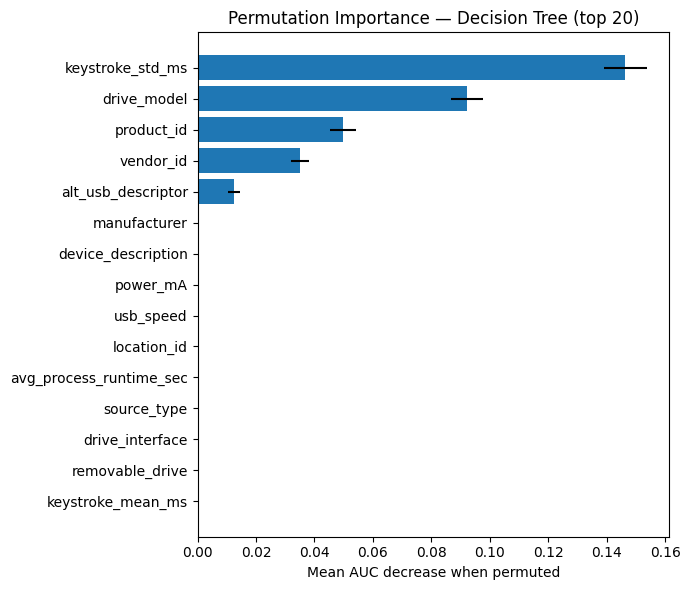

In [131]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(dt, X_test, y_test,
                            scoring="roc_auc", n_repeats=15,
                            random_state=42, n_jobs=-1)

pi_mean = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
pi_std  = pd.Series(pi.importances_std,  index=feat_names).reindex(pi_mean.index)

print("\nPermutation Importance (top 20):\n", pi_mean.head(20))

plt.figure(figsize=(7,6))
plt.barh(pi_mean.head(20).index[::-1], pi_mean.head(20).values[::-1],
         xerr=pi_std.head(20).values[::-1])
plt.xlabel("Mean AUC decrease when permuted")
plt.title("Permutation Importance — Decision Tree (top 20)")
plt.tight_layout(); plt.show()


In [132]:
# =========================
# Ensemble: average of models
# =========================
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, f1_score

# (A) --- Helper: wrap Booster as a sklearn-like classifier with predict_proba
class BoosterEstimator(BaseEstimator, ClassifierMixin):
    _estimator_type = "classifier"
    def __init__(self, booster):
        self.booster = booster
        self.best_it = getattr(booster, "best_iteration", None)
        self.classes_ = np.array([0, 1])
    def fit(self, X, y):  # no-op (already trained)
        return self
    def _predict_raw(self, X):
        dm = X if isinstance(X, xgb.DMatrix) else xgb.DMatrix(X)
        if self.best_it is not None:
            try:
                return self.booster.predict(dm, iteration_range=(0, self.best_it + 1))
            except TypeError:
                return self.booster.predict(dm, ntree_limit=self.best_it + 1)
        return self.booster.predict(dm)
    def predict_proba(self, X):
        p = self._predict_raw(X)
        return np.c_[1 - p, p]
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)

# (B) --- Helper: ensure an estimator has predict_proba (calibrate if needed)
def as_proba_estimator(est, X_cal, y_cal):
    # XGBoost Booster
    if isinstance(est, xgb.Booster):
        return BoosterEstimator(est)
    # Already probabilistic
    if hasattr(est, "predict_proba"):
        return est
    # Has decision_function (e.g., SVC without probability): calibrate
    if hasattr(est, "decision_function"):
        return CalibratedClassifierCV(est, method="sigmoid", cv="prefit").fit(X_cal, y_cal)
    raise ValueError(f"Estimator {type(est)} has no probability output.")

# (C) --- Collect your trained models here (use the variable names you already have)
# Add/remove lines depending on what you trained:
MODELS = {}
if "log_clf" in globals():   MODELS["logreg"] = log_clf
if "svc" in globals():       MODELS["svm"]    = svc          # if not probabilistic, we calibrate below
if "knn" in globals():       MODELS["knn"]    = knn
if "dt" in globals():        MODELS["tree"]   = dt
if "clf" in globals():       MODELS["xgb_skl"]= clf          # XGBClassifier path (if you used it)
if "bst" in globals():       MODELS["xgb_booster"] = bst      # Booster path (if you used it)

# (D) --- Wrap/calibrate models so all have predict_proba
# Use your held-out validation set (X_va, y_va) if available; otherwise fall back to X_train, y_train
X_cal, y_cal = (X_va, y_va) if "X_va" in globals() and "y_va" in globals() else (X_train, y_train)
MODELS_PROBA = {name: as_proba_estimator(m, X_cal, y_cal) for name, m in MODELS.items()}

# (E) --- Optional: weights (default equal). Fill with your CV AUCs if you want weighted average.
# Example: WEIGHTS = {"logreg": 0.78, "svm": 0.80, "knn": 0.75, "tree": 0.73, "xgb_booster": 0.86}
WEIGHTS = None  # or a dict like above

def ensemble_proba(X):
    """Return per-model probs and the (weighted) ensemble probability."""
    # Ensure column order matches training
    if hasattr(X_train, "columns") and hasattr(X, "reindex"):
        X = X.reindex(columns=X_train.columns, fill_value=0)

    per_model = {}
    for name, est in MODELS_PROBA.items():
        p = est.predict_proba(X)[:, 1]
        per_model[name] = p

    P = pd.DataFrame(per_model)  # shape: [n_samples, n_models]
    if WEIGHTS is None:
        ens = P.mean(axis=1).values
    else:
        # Align weights to columns; normalize
        w = np.array([WEIGHTS.get(c, 0.0) for c in P.columns], dtype=float)
        if w.sum() == 0:
            ens = P.mean(axis=1).values
        else:
            w = w / w.sum()
            ens = (P.values * w).sum(axis=1)
    return P, ens

# (F) --- Optional: learn a better threshold on validation (Youden’s J or max-F1)
def best_threshold(y_true, y_score, method="youden"):
    if method == "youden":
        fpr, tpr, thr = roc_curve(y_true, y_score)
        return thr[np.argmax(tpr - fpr)]
    elif method == "f1":
        ts = np.linspace(0.05, 0.95, 19)
        f1s = [f1_score(y_true, (y_score >= t).astype(int)) for t in ts]
        return ts[int(np.argmax(f1s))]
    else:
        return 0.5

# If you have a validation set, fit threshold there; else default to 0.5
if "X_va" in globals():
    _, ens_va = ensemble_proba(X_va)
    THRESH = best_threshold(y_va, ens_va, method="youden")  # or "f1"
else:
    THRESH = 0.5

print(f"Ensemble decision threshold = {THRESH:.3f}")


Ensemble decision threshold = 0.626


In [133]:
# Example: X_device is a 1-row DataFrame of your device's features
# X_device = pd.DataFrame([device_feature_dict])[X_train.columns]

# per_model_probs, p_ens = ensemble_proba(X_device)
# final_prob = float(p_ens[0])
# final_label = int(final_prob >= THRESH)

# print("Per-model probs:\n", per_model_probs.T)
# print(f"\nEnsemble prob = {final_prob:.4f}")
# print("Prediction:", "MALICIOUS" if final_label == 1 else "BENIGN")
